In [39]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Load the data
lb_df = pd.read_csv('LB_Secondary_Defense.csv')
metric = 'Current_PFF'  # Metric to predict

In [41]:
print(lb_df.columns)

Index(['Team', 'Year', 'Position', 'Value_cap_space', 'Value_draft_data',
       'Current_AV', 'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       ...
       'Previous_snap_counts_pass_rush', 'Previous_snap_counts_run_defense',
       'Previous_snap_counts_slot', 'Previous_stops', 'Previous_tackles',
       'Previous_tackles_for_loss', 'Previous_targets',
       'Previous_total_pressures', 'Previous_touchdowns', 'Previous_yards'],
      dtype='object', length=108)


In [42]:
# Sort data by Team and Year
lb_df = lb_df.sort_values(by=['Team', 'Year'])
print(lb_df.head())

      Team  Year Position  Value_cap_space  Value_draft_data  Current_AV  \
17   49ers  2019       LB        15.993624        146.484990        28.0   
50   49ers  2020       LB         2.991927        144.514132        34.0   
70   49ers  2021       LB         4.131507        110.101206        26.0   
123  49ers  2022       LB         7.934678         48.812538        33.0   
12   Bears  2019       LB         9.681190        491.560918        35.0   

     Current_PFF Total DVOA  win-loss-pct  Net EPA  ...  \
17     63.131934     27.90%      0.812500    0.216  ...   
50     73.581955      5.40%      0.375000    0.025  ...   
70     66.076498     19.50%      0.588235    0.081  ...   
123    79.201195     27.60%      0.764706    0.196  ...   
12     64.207627     -2.10%      0.500000   -0.032  ...   

     Previous_snap_counts_pass_rush  Previous_snap_counts_run_defense  \
17                        48.207362                        268.502249   
50                        39.768498       

In [43]:
team_data = lb_df.groupby('Team')

In [44]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][[
                                        'Previous_batted_passes',
                                        'Previous_tackles_for_loss',
                                        'Previous_hits',
                                        'Previous_pass_break_ups',
                                        'Previous_snap_counts_dl_outside_t',
                                        'Previous_snap_counts_dl',
                                        'Previous_hurries'  # Adjusted for relevance if applicable.
                                        ]]
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [45]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

[[[0.00000000e+00 2.78200409e+00 1.95910020e+00 3.33742331e+00
   3.94928425e+01 3.94928425e+01 3.65930470e+00]
  [4.26222415e-01 2.38727823e+00 1.16616183e+00 3.76070965e+00
   3.27546517e+01 3.27546517e+01 3.88273475e+00]
  [1.48346304e-01 4.55739300e+00 4.27480545e+00 2.23346304e+00
   5.45987354e+01 5.45987354e+01 5.48978599e+00]]

 [[4.92760859e-01 5.21867199e+00 1.04143784e+00 2.30354468e+00
   8.17523714e+00 8.17523714e+00 9.54667998e+00]
  [1.06181456e-01 2.76271186e+00 1.04835494e+00 1.33649053e+00
   1.28499501e+01 1.28499501e+01 5.57826520e+00]
  [0.00000000e+00 9.14643043e+00 1.49244398e+00 3.88900469e+00
   9.64252215e+00 9.64252215e+00 5.87389265e+00]]

 [[0.00000000e+00 1.92718823e+00 2.60263362e-01 1.87567777e+00
   3.07257940e+01 3.07257940e+01 2.33772270e+00]
  [6.47763075e-01 2.68809074e+00 1.88909893e+00 1.90989288e+00
   2.69426591e+01 2.69426591e+01 5.62318841e+00]
  [0.00000000e+00 3.77159656e+00 6.41338761e-01 1.45771144e+00
   3.81311624e+01 3.81311624e+01 3.29

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
# Define the input layer
inputs = Input(shape=(3, 7))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4336.3721 - val_loss: 3865.1179
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4226.0576 - val_loss: 3774.0156
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4031.0530 - val_loss: 3675.7825
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4137.8125 - val_loss: 3564.1438
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3913.8342 - val_loss: 3434.5898


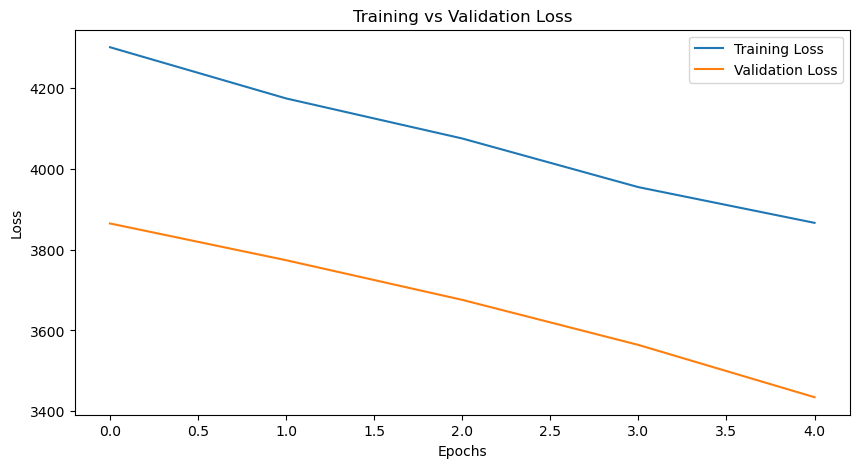

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
R² Score: -50.3265


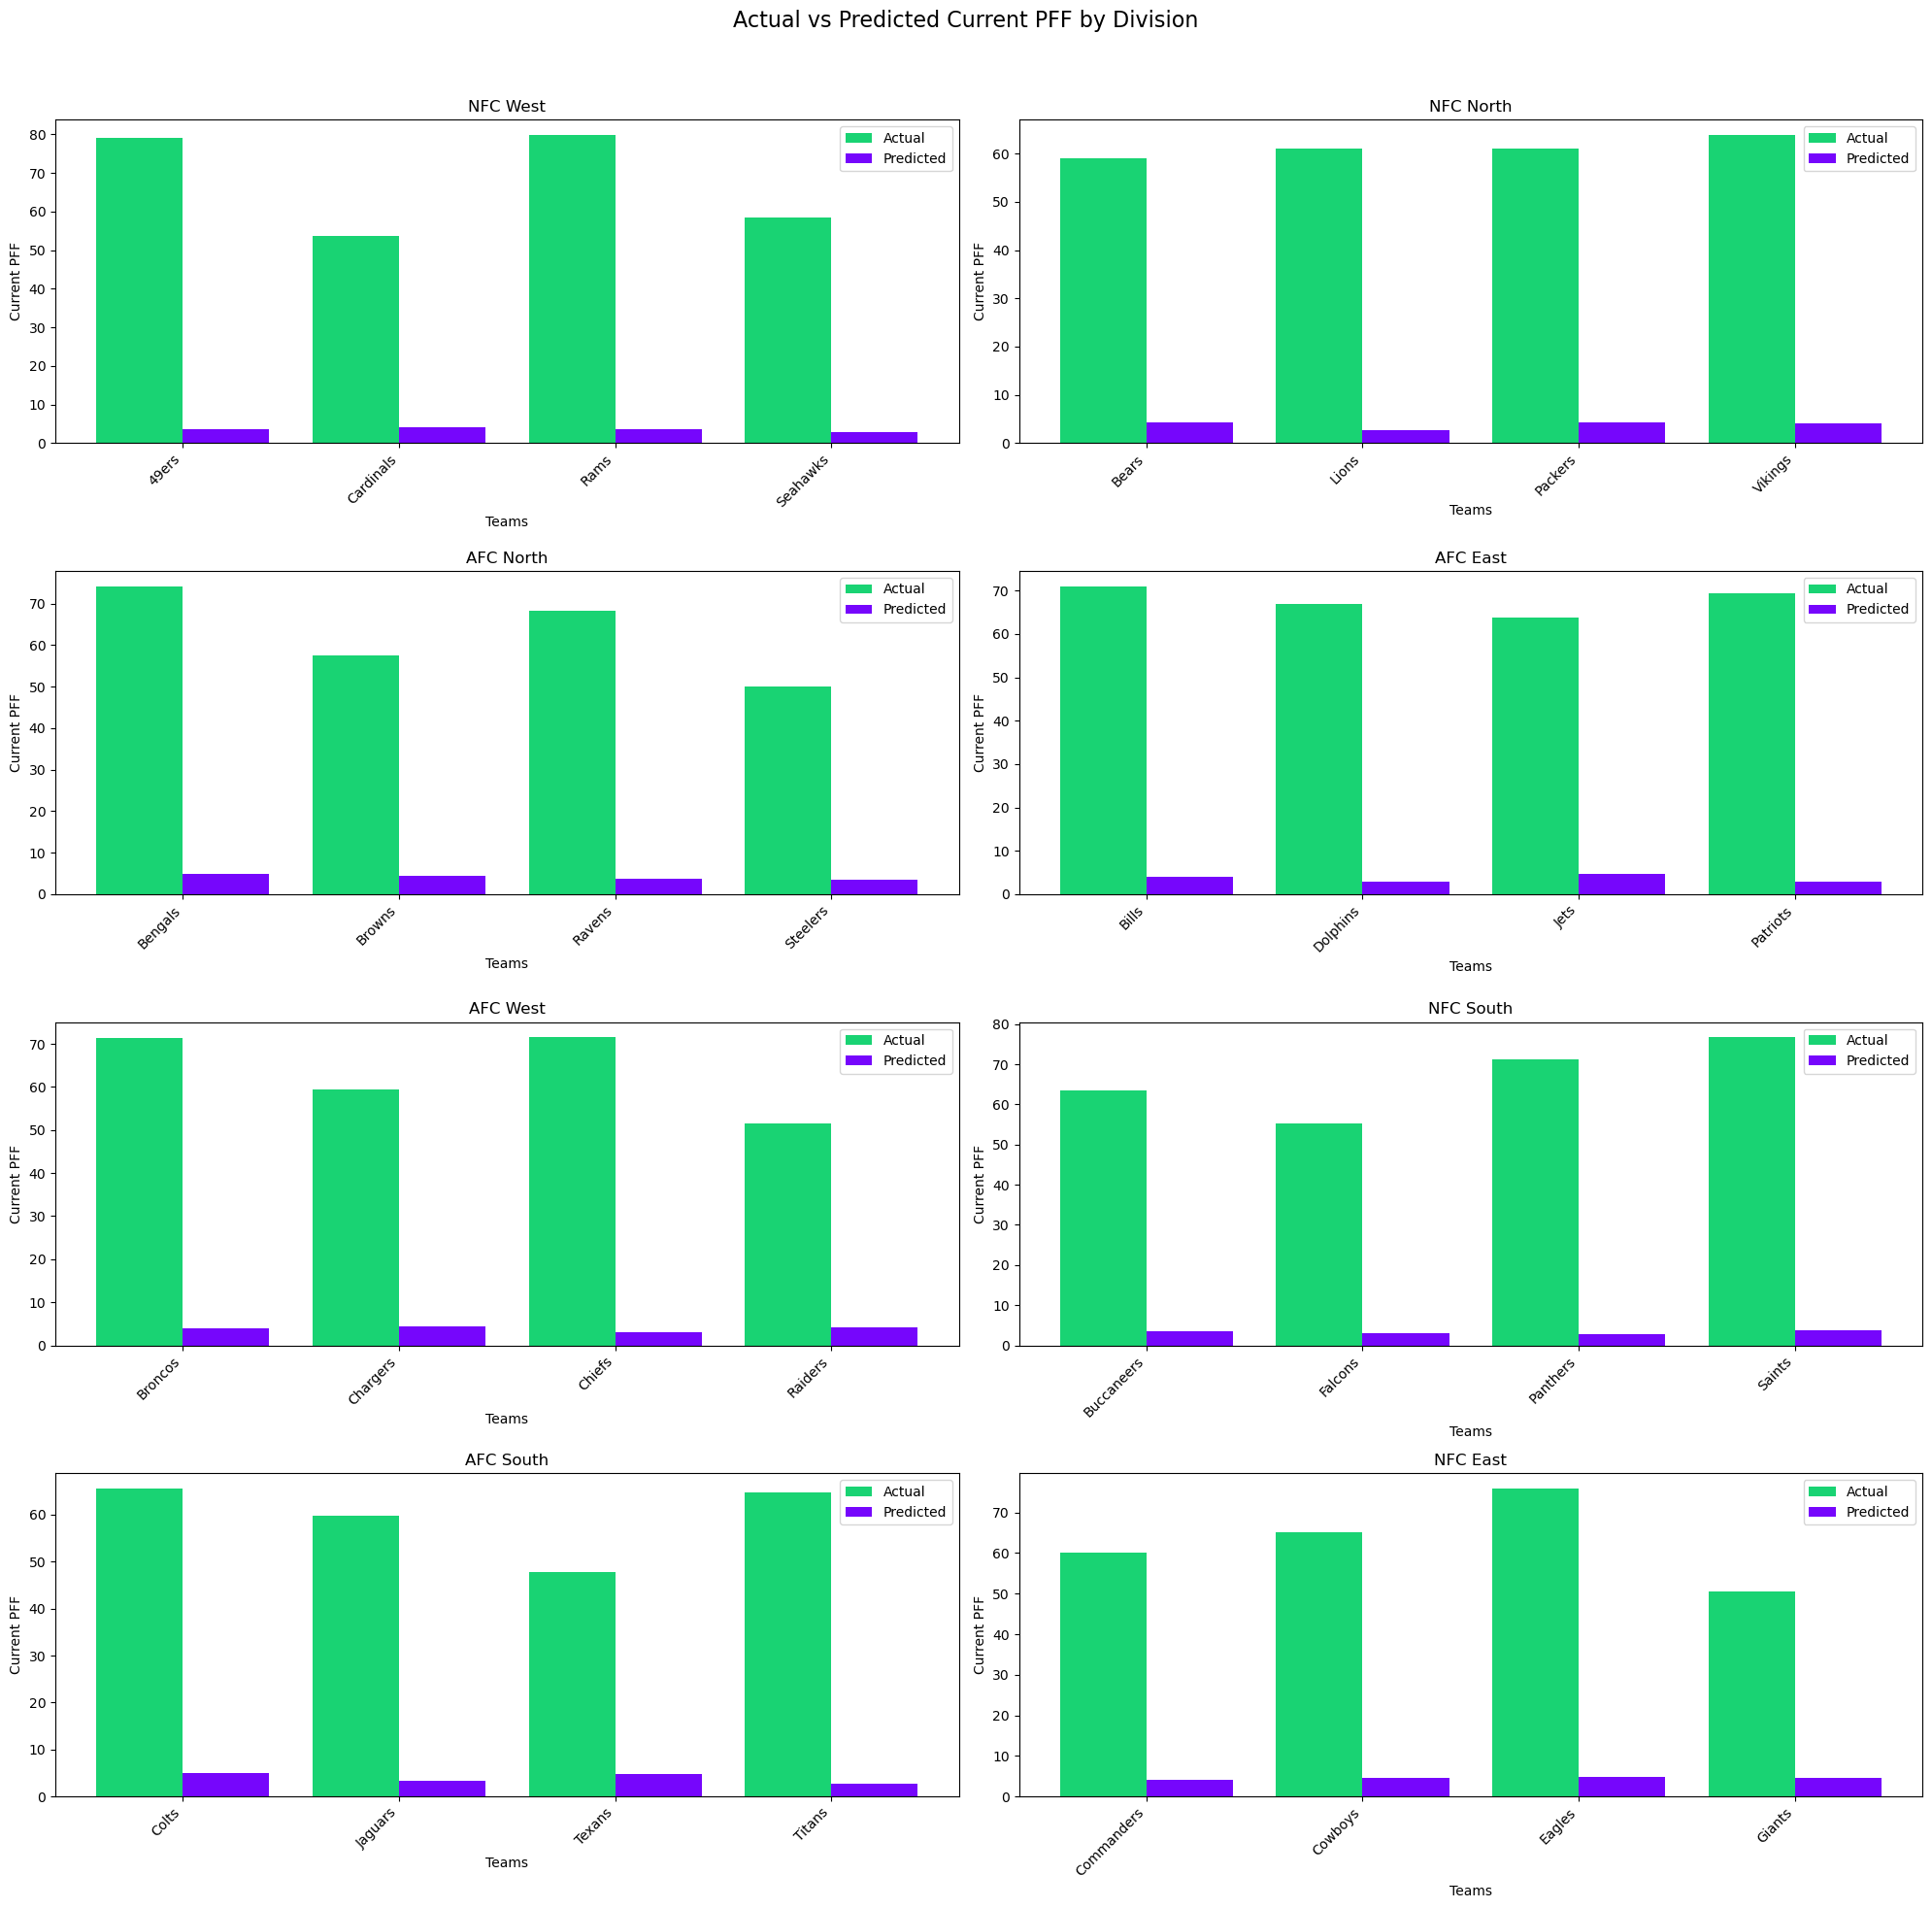

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3625.2715 - val_loss: 3276.8074
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3507.3782 - val_loss: 3086.6624
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3402.8098 - val_loss: 2849.3528
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3183.7761 - val_loss: 2555.9539
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2798.9099 - val_loss: 2209.8044
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2263.4795 - val_loss: 1806.3942
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2077.0752 - val_loss: 1352.8097
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1385.4698 - val_loss: 881.8268
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 766.9609 - val_loss: 455.6494
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 380.4361 - val_loss: 164.7251


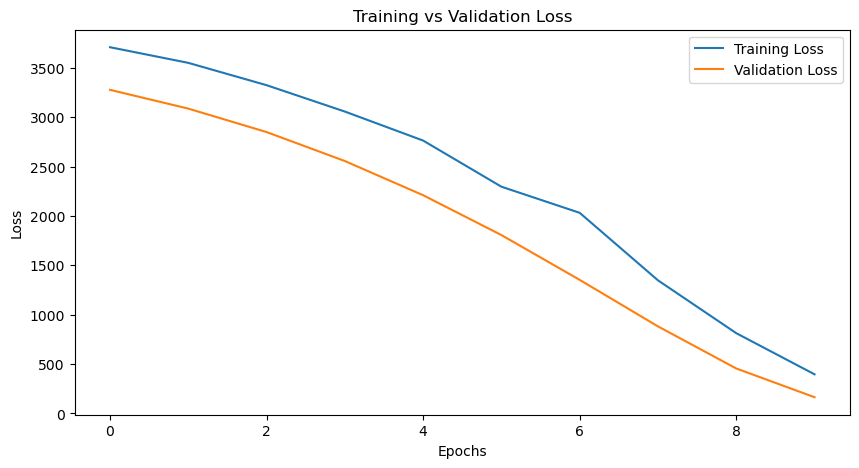

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R² Score: -1.7220


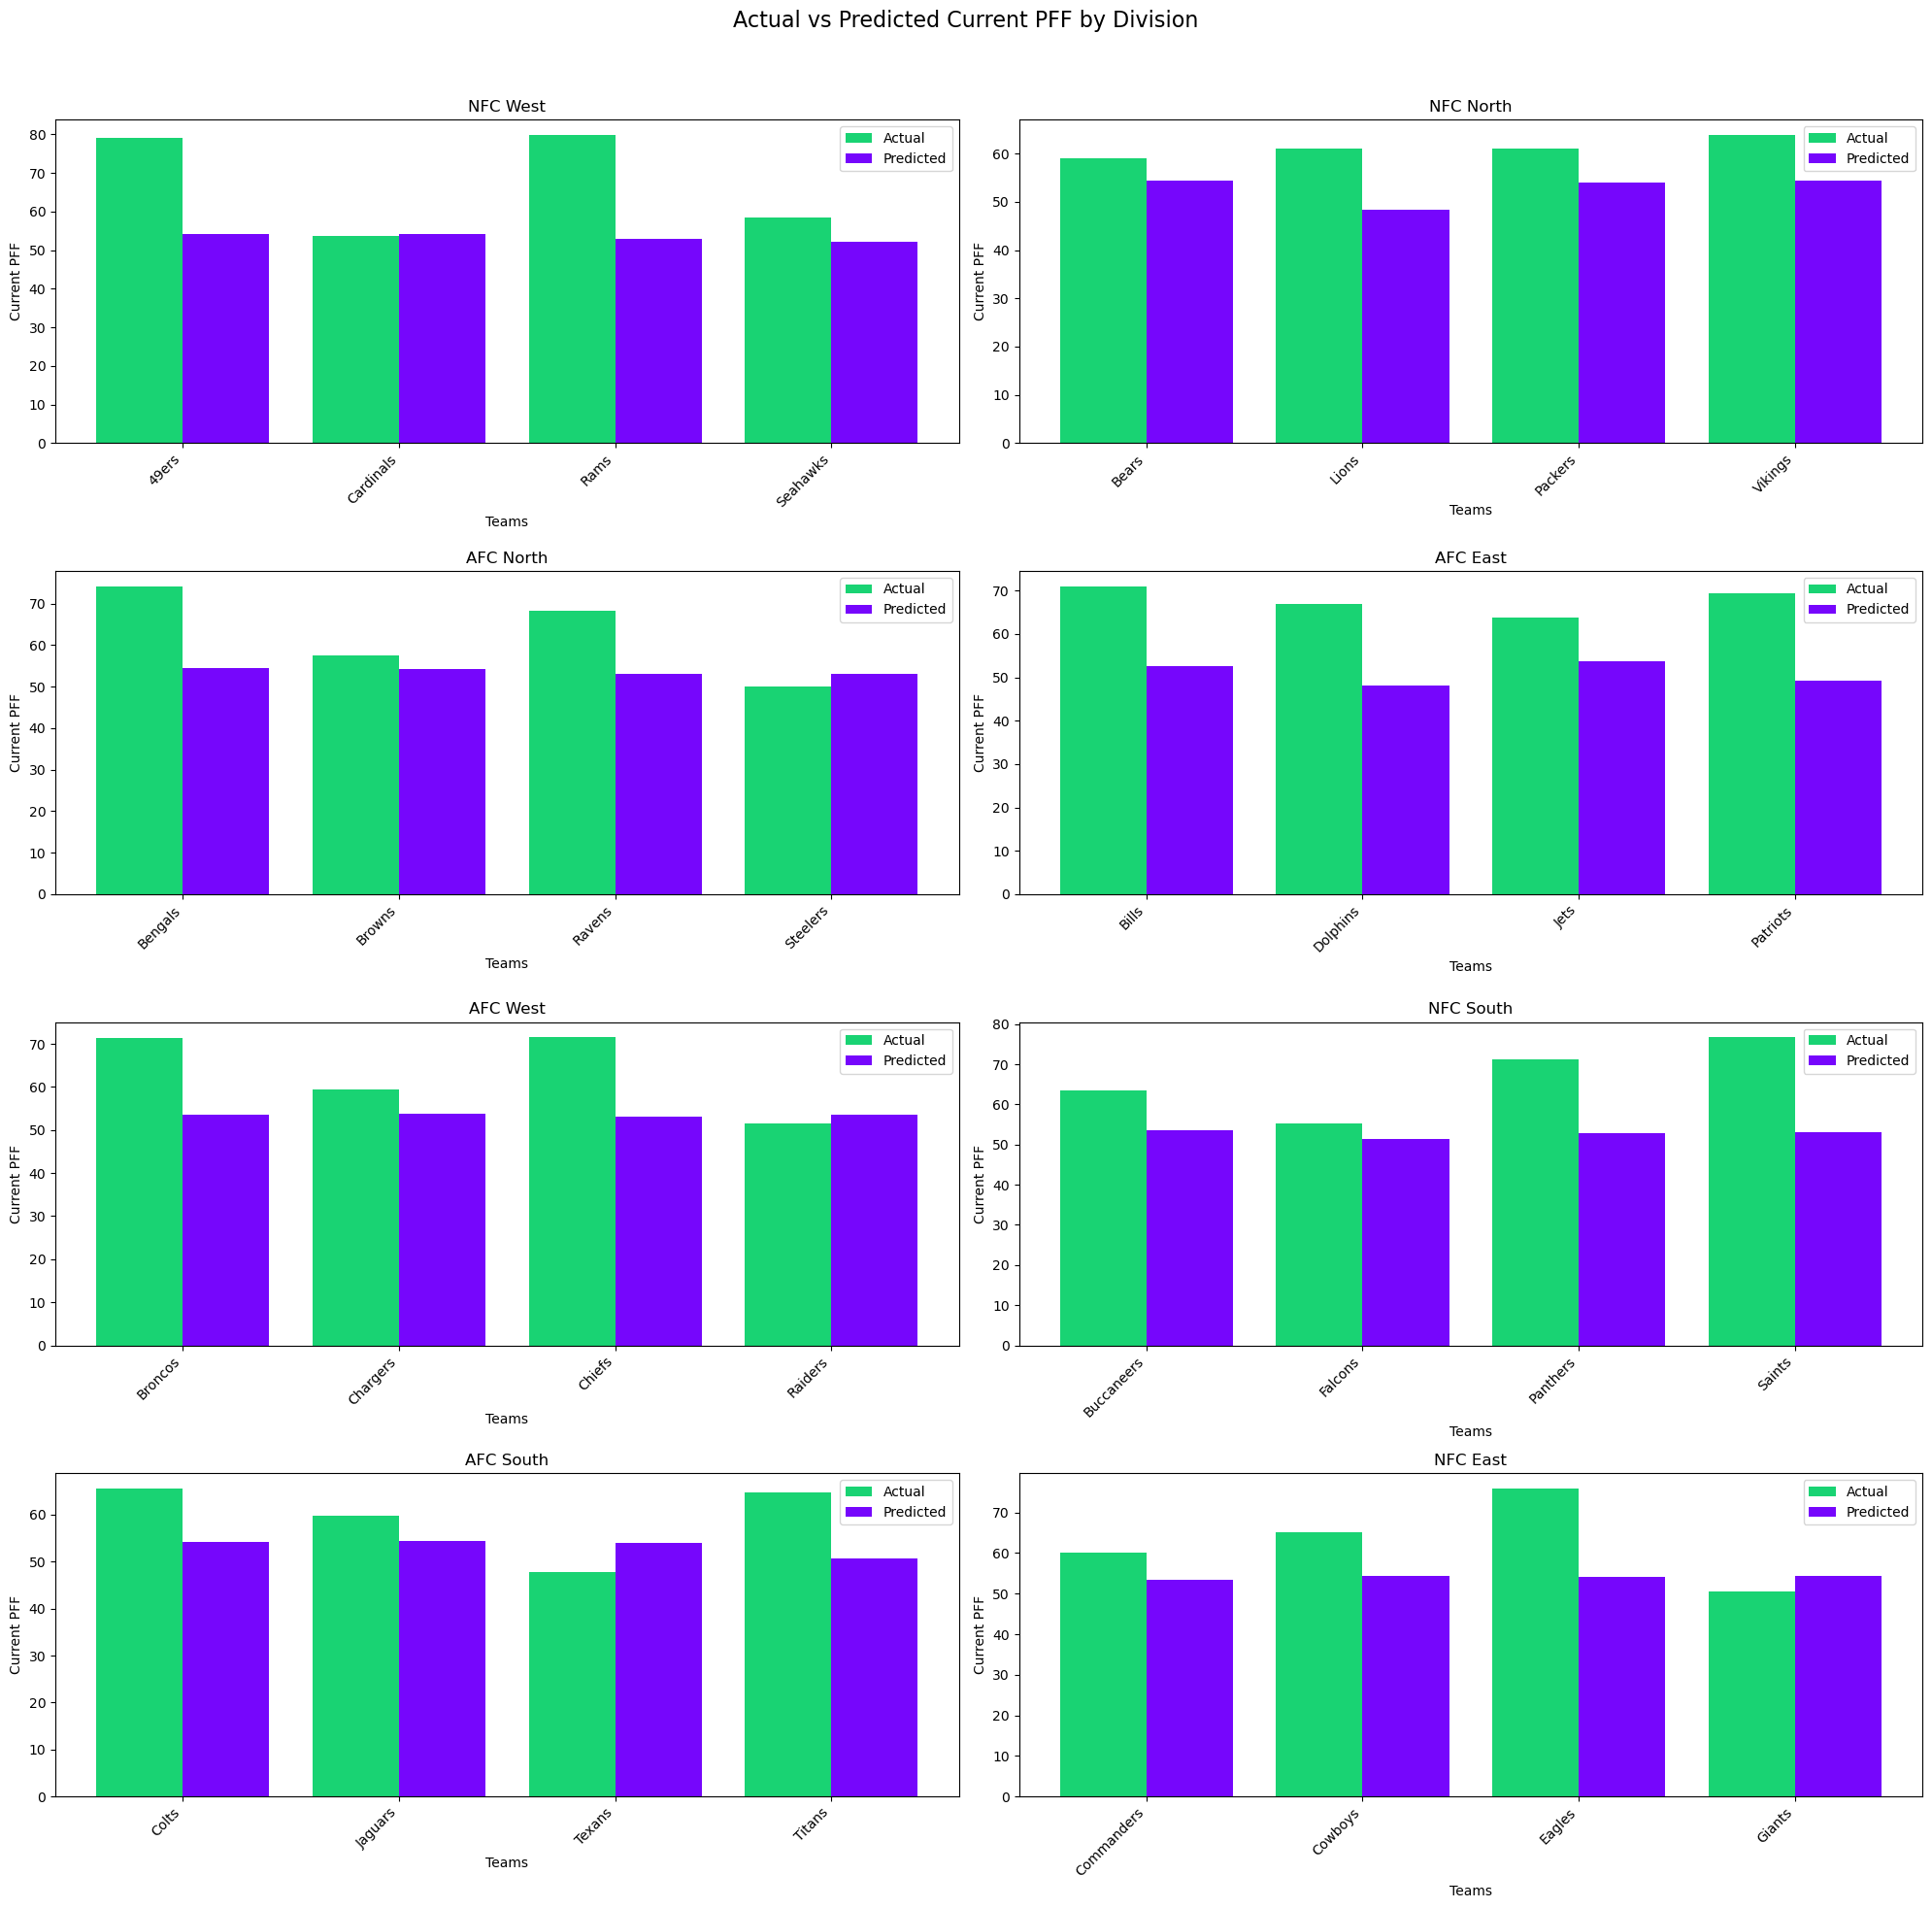

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 298.0753 - val_loss: 97.9008
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 116.0963 - val_loss: 165.6025
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 172.5084 - val_loss: 180.0435
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 141.8437 - val_loss: 141.7490
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 129.6119 - val_loss: 111.5137
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 133.5608 - val_loss: 102.2728
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 143.2713 - val_loss: 97.2523
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 148.0367 - val_loss: 93.5184
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.6684 - val_loss: 92.4764
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 137.8010 - val_loss: 92.0267
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79.0432 - val_loss: 91.9138
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 103

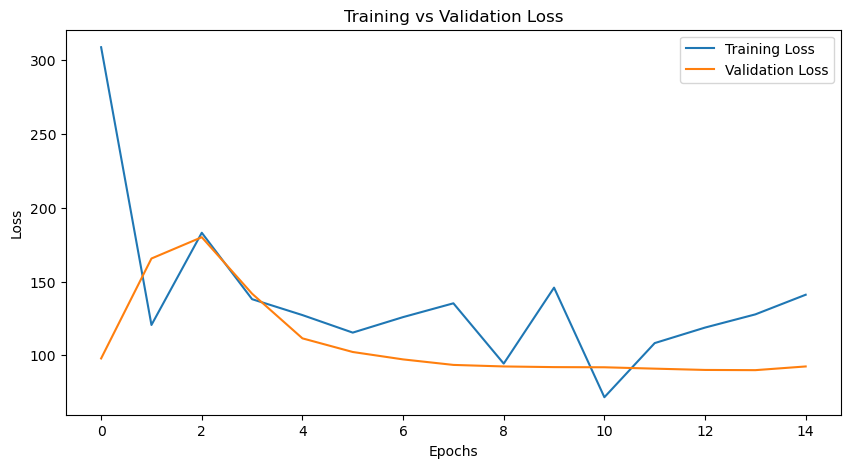

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: -0.1470


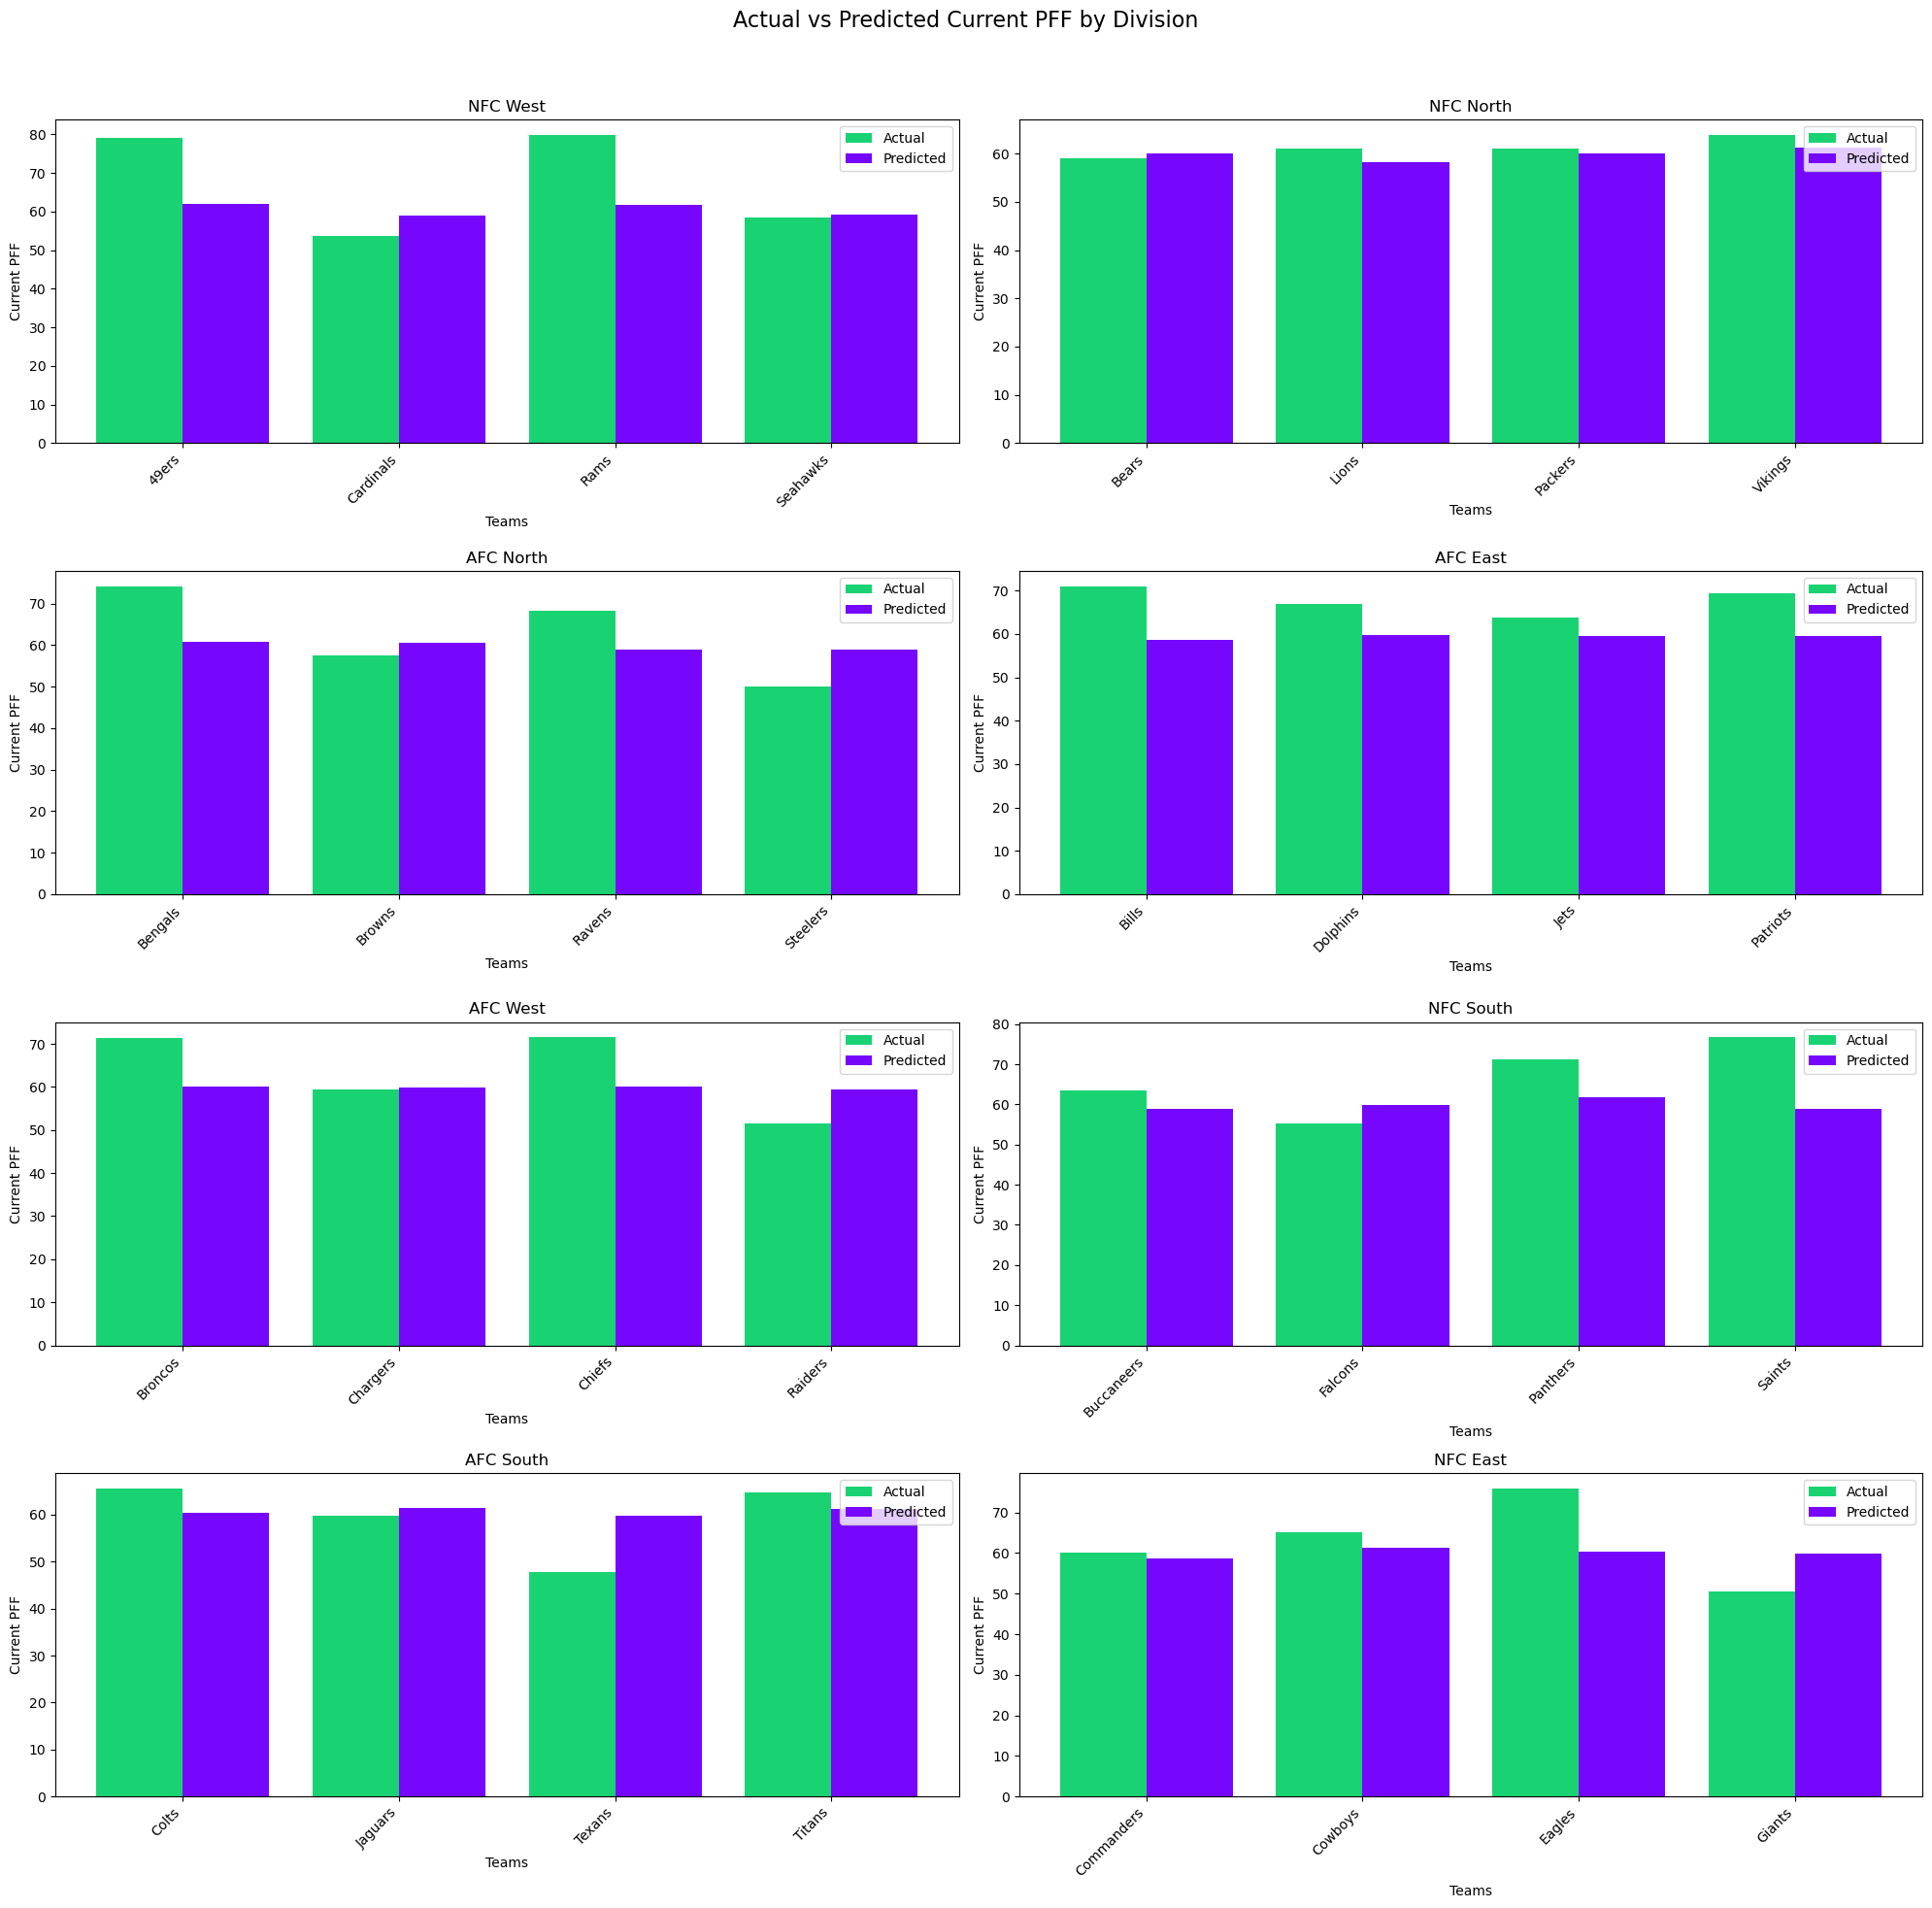

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 161.1204 - val_loss: 94.0244
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 101.5759 - val_loss: 89.3414
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96.5804 - val_loss: 88.6270
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91.8706 - val_loss: 96.6961
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 212.2522 - val_loss: 100.6544
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124.8851 - val_loss: 99.5705
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.0587 - val_loss: 93.2001
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 258.6840 - val_loss: 89.3136
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119.0948 - val_loss: 83.2167
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 150.2542 - val_loss: 82.2469
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.2305 - val_loss: 86.9256
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 127.7341 

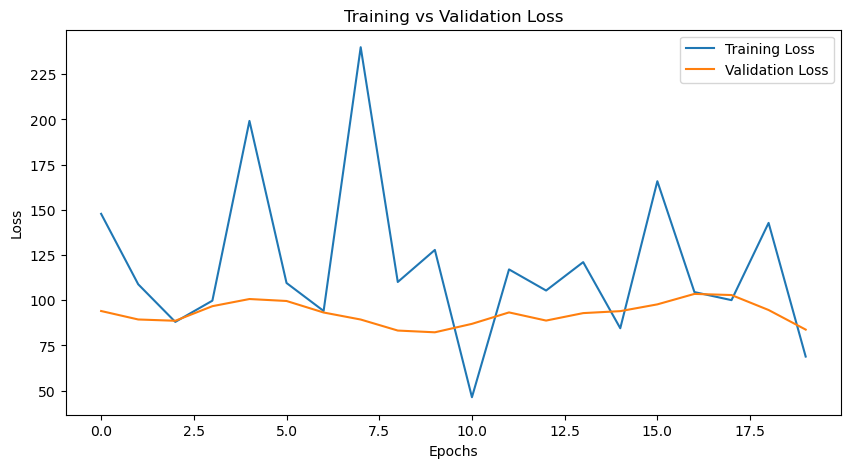

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.2052


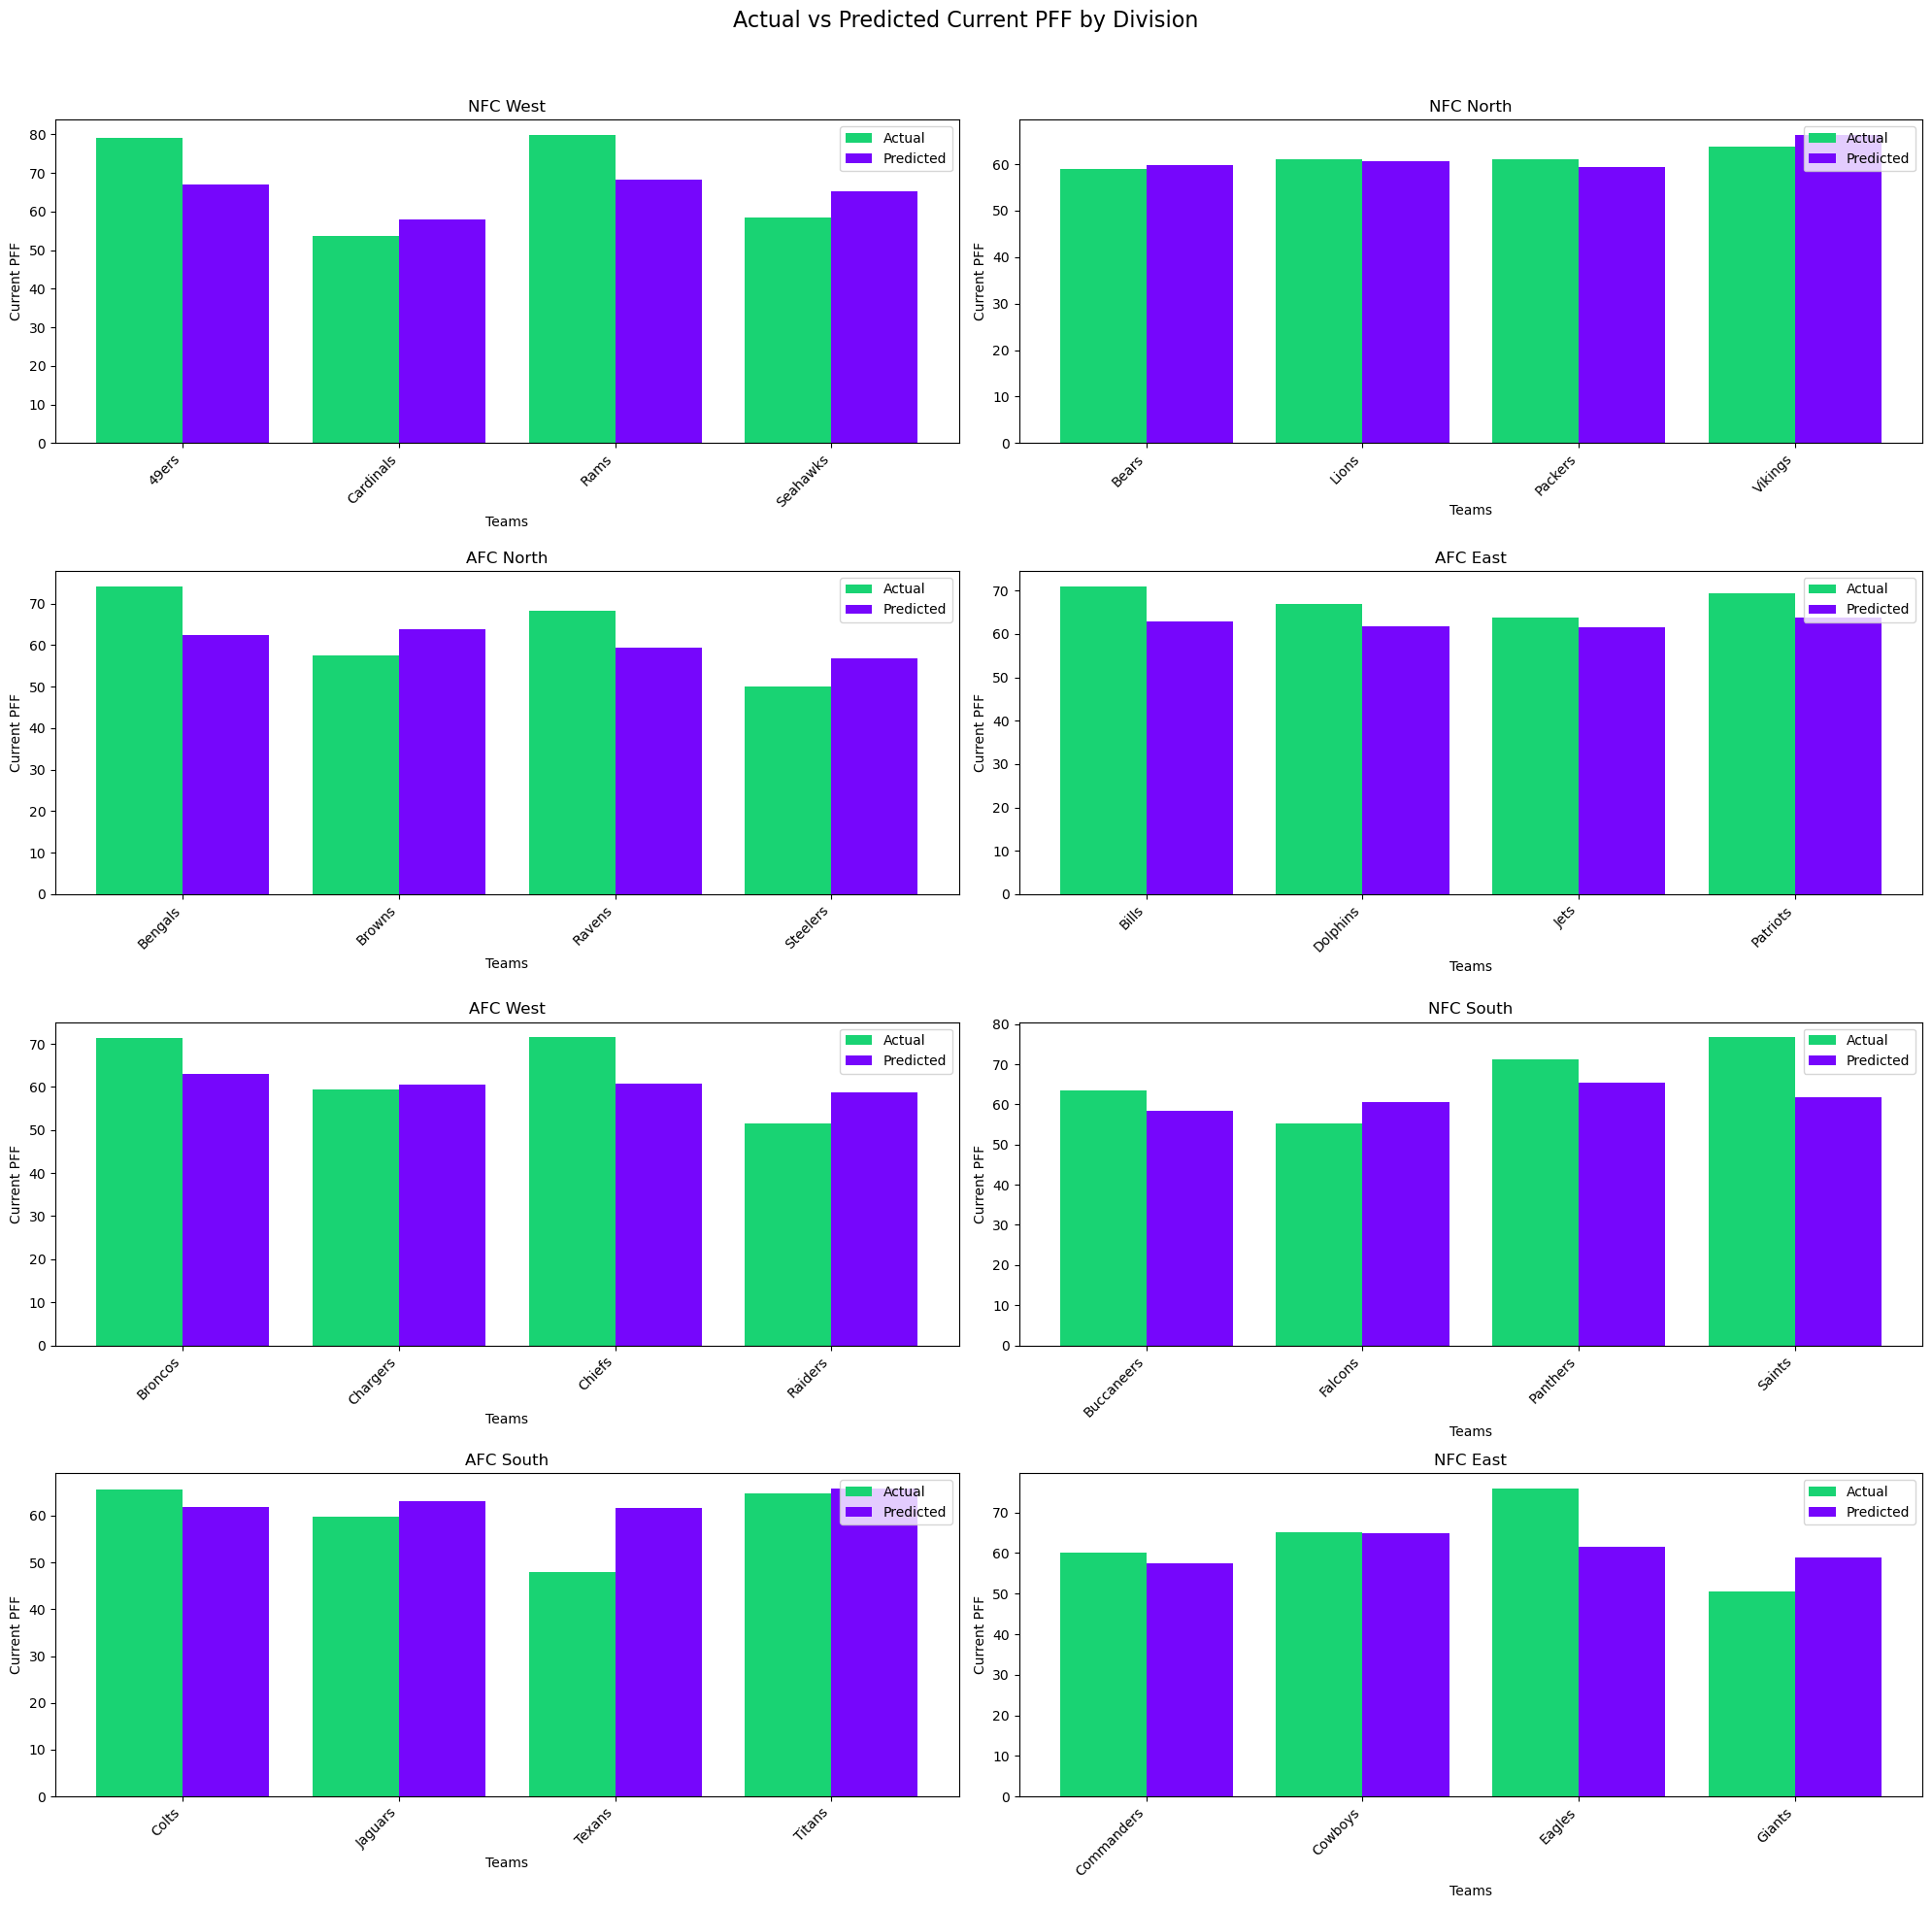

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 99.9624 - val_loss: 83.4716
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 92.0312 - val_loss: 88.7525
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 129.3652 - val_loss: 118.4535
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 113.2401 - val_loss: 150.3608
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 173.7791 - val_loss: 129.4881
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.3148 - val_loss: 99.5078
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.0632 - val_loss: 97.0073
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 143.0439 - val_loss: 87.1623
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91.3651 - val_loss: 85.7224
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119.5788 - val_loss: 93.0337
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63.9575 - val_loss: 118.2683
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 136.2516

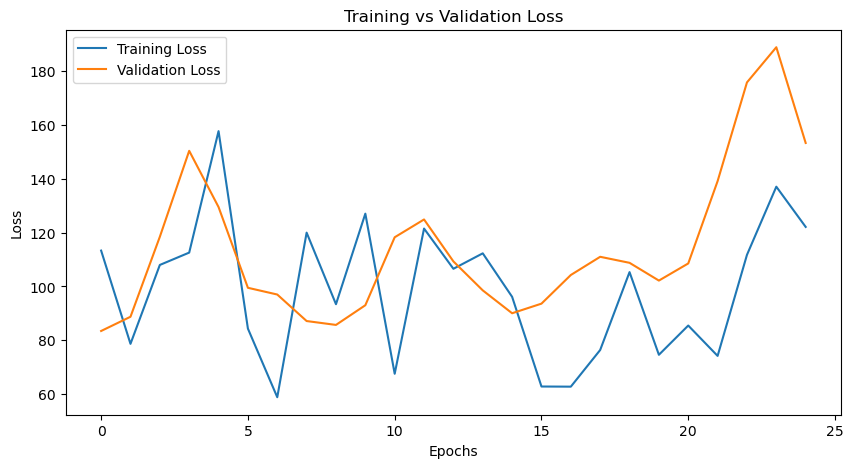

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.2371


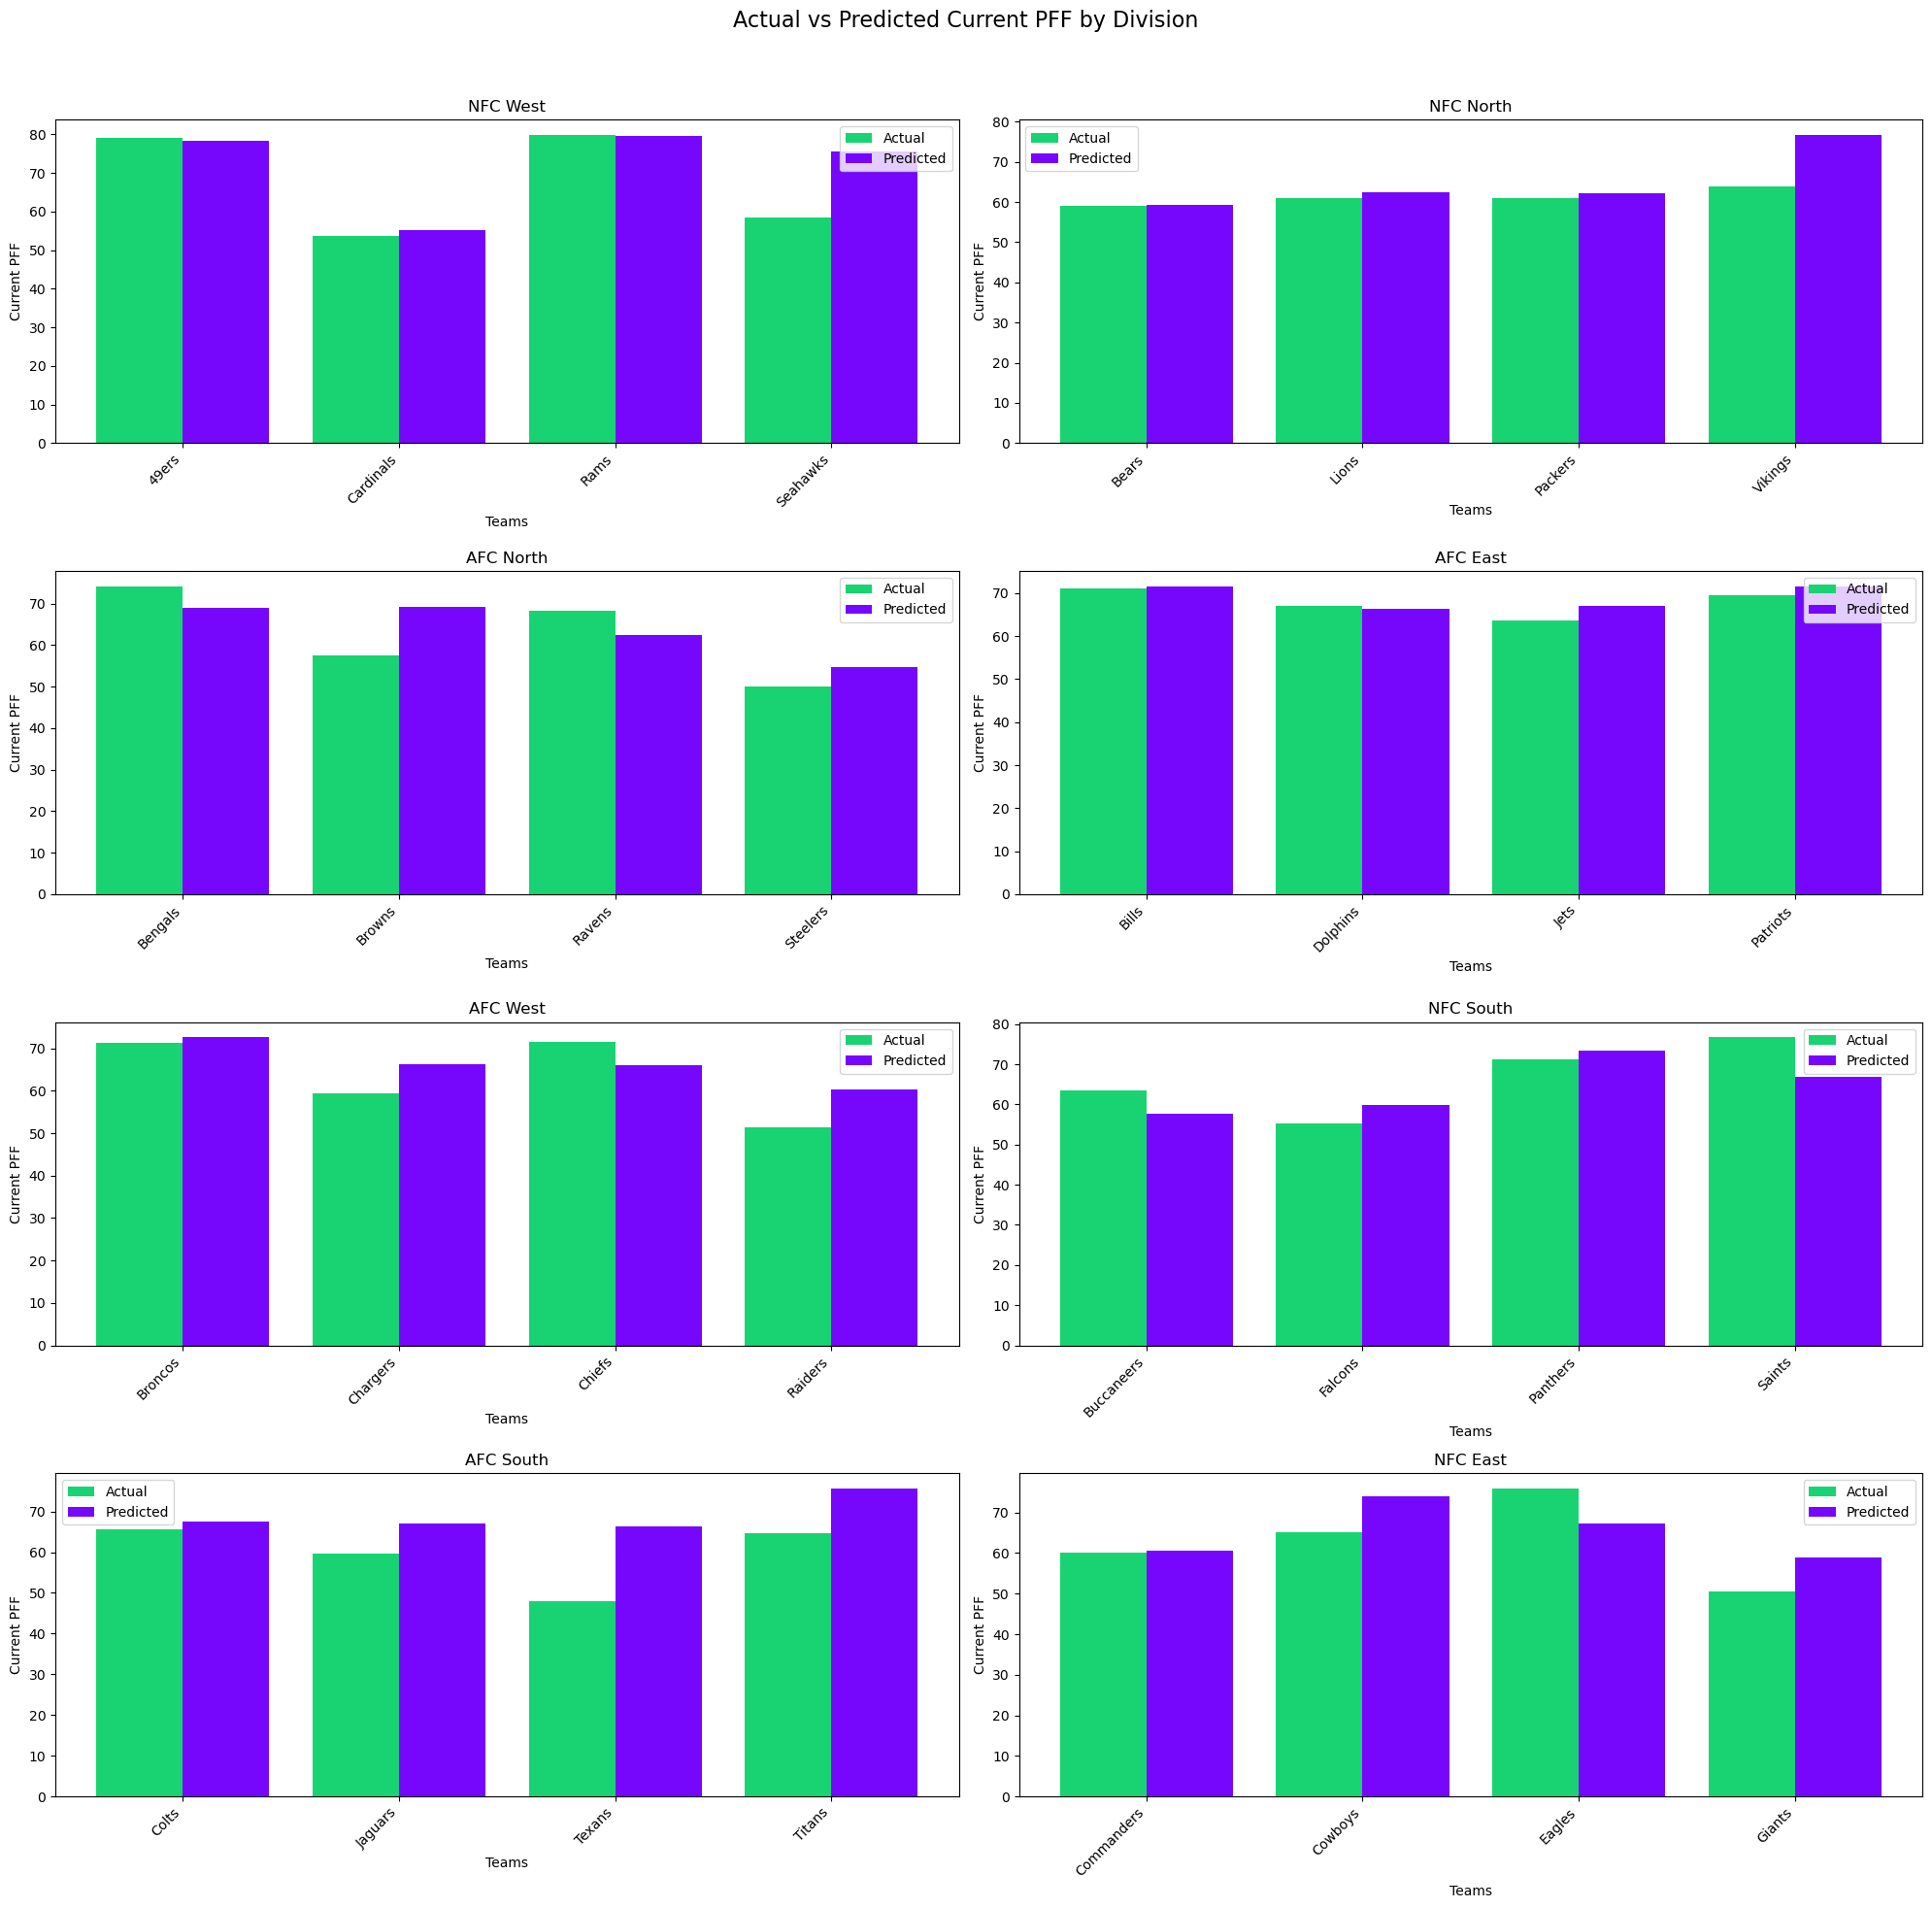

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.5783 - val_loss: 126.1215
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 147.1703 - val_loss: 125.5477
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.1088 - val_loss: 134.5504
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102.9657 - val_loss: 146.9475
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 80.2361 - val_loss: 136.8191
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.7549 - val_loss: 131.1521
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 155.1803 - val_loss: 135.7414
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 118.7993 - val_loss: 161.8456
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.6889 - val_loss: 172.3296
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119.2227 - val_loss: 130.5518
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.0512 - val_loss: 122.7628
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1

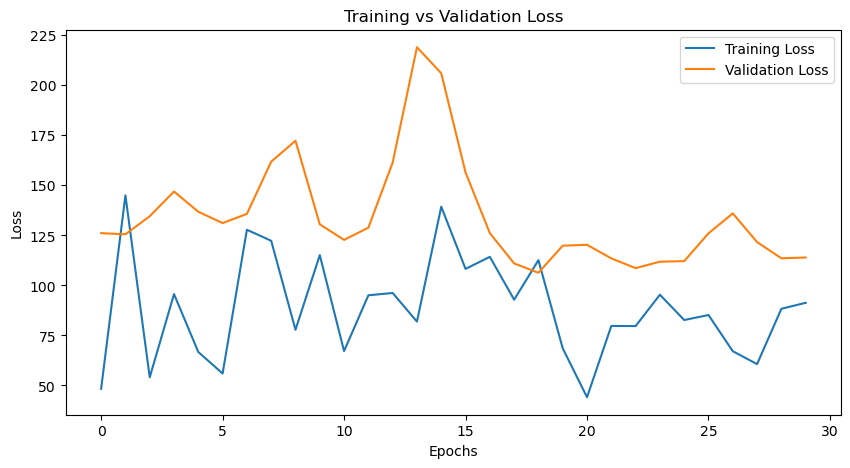

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.2063


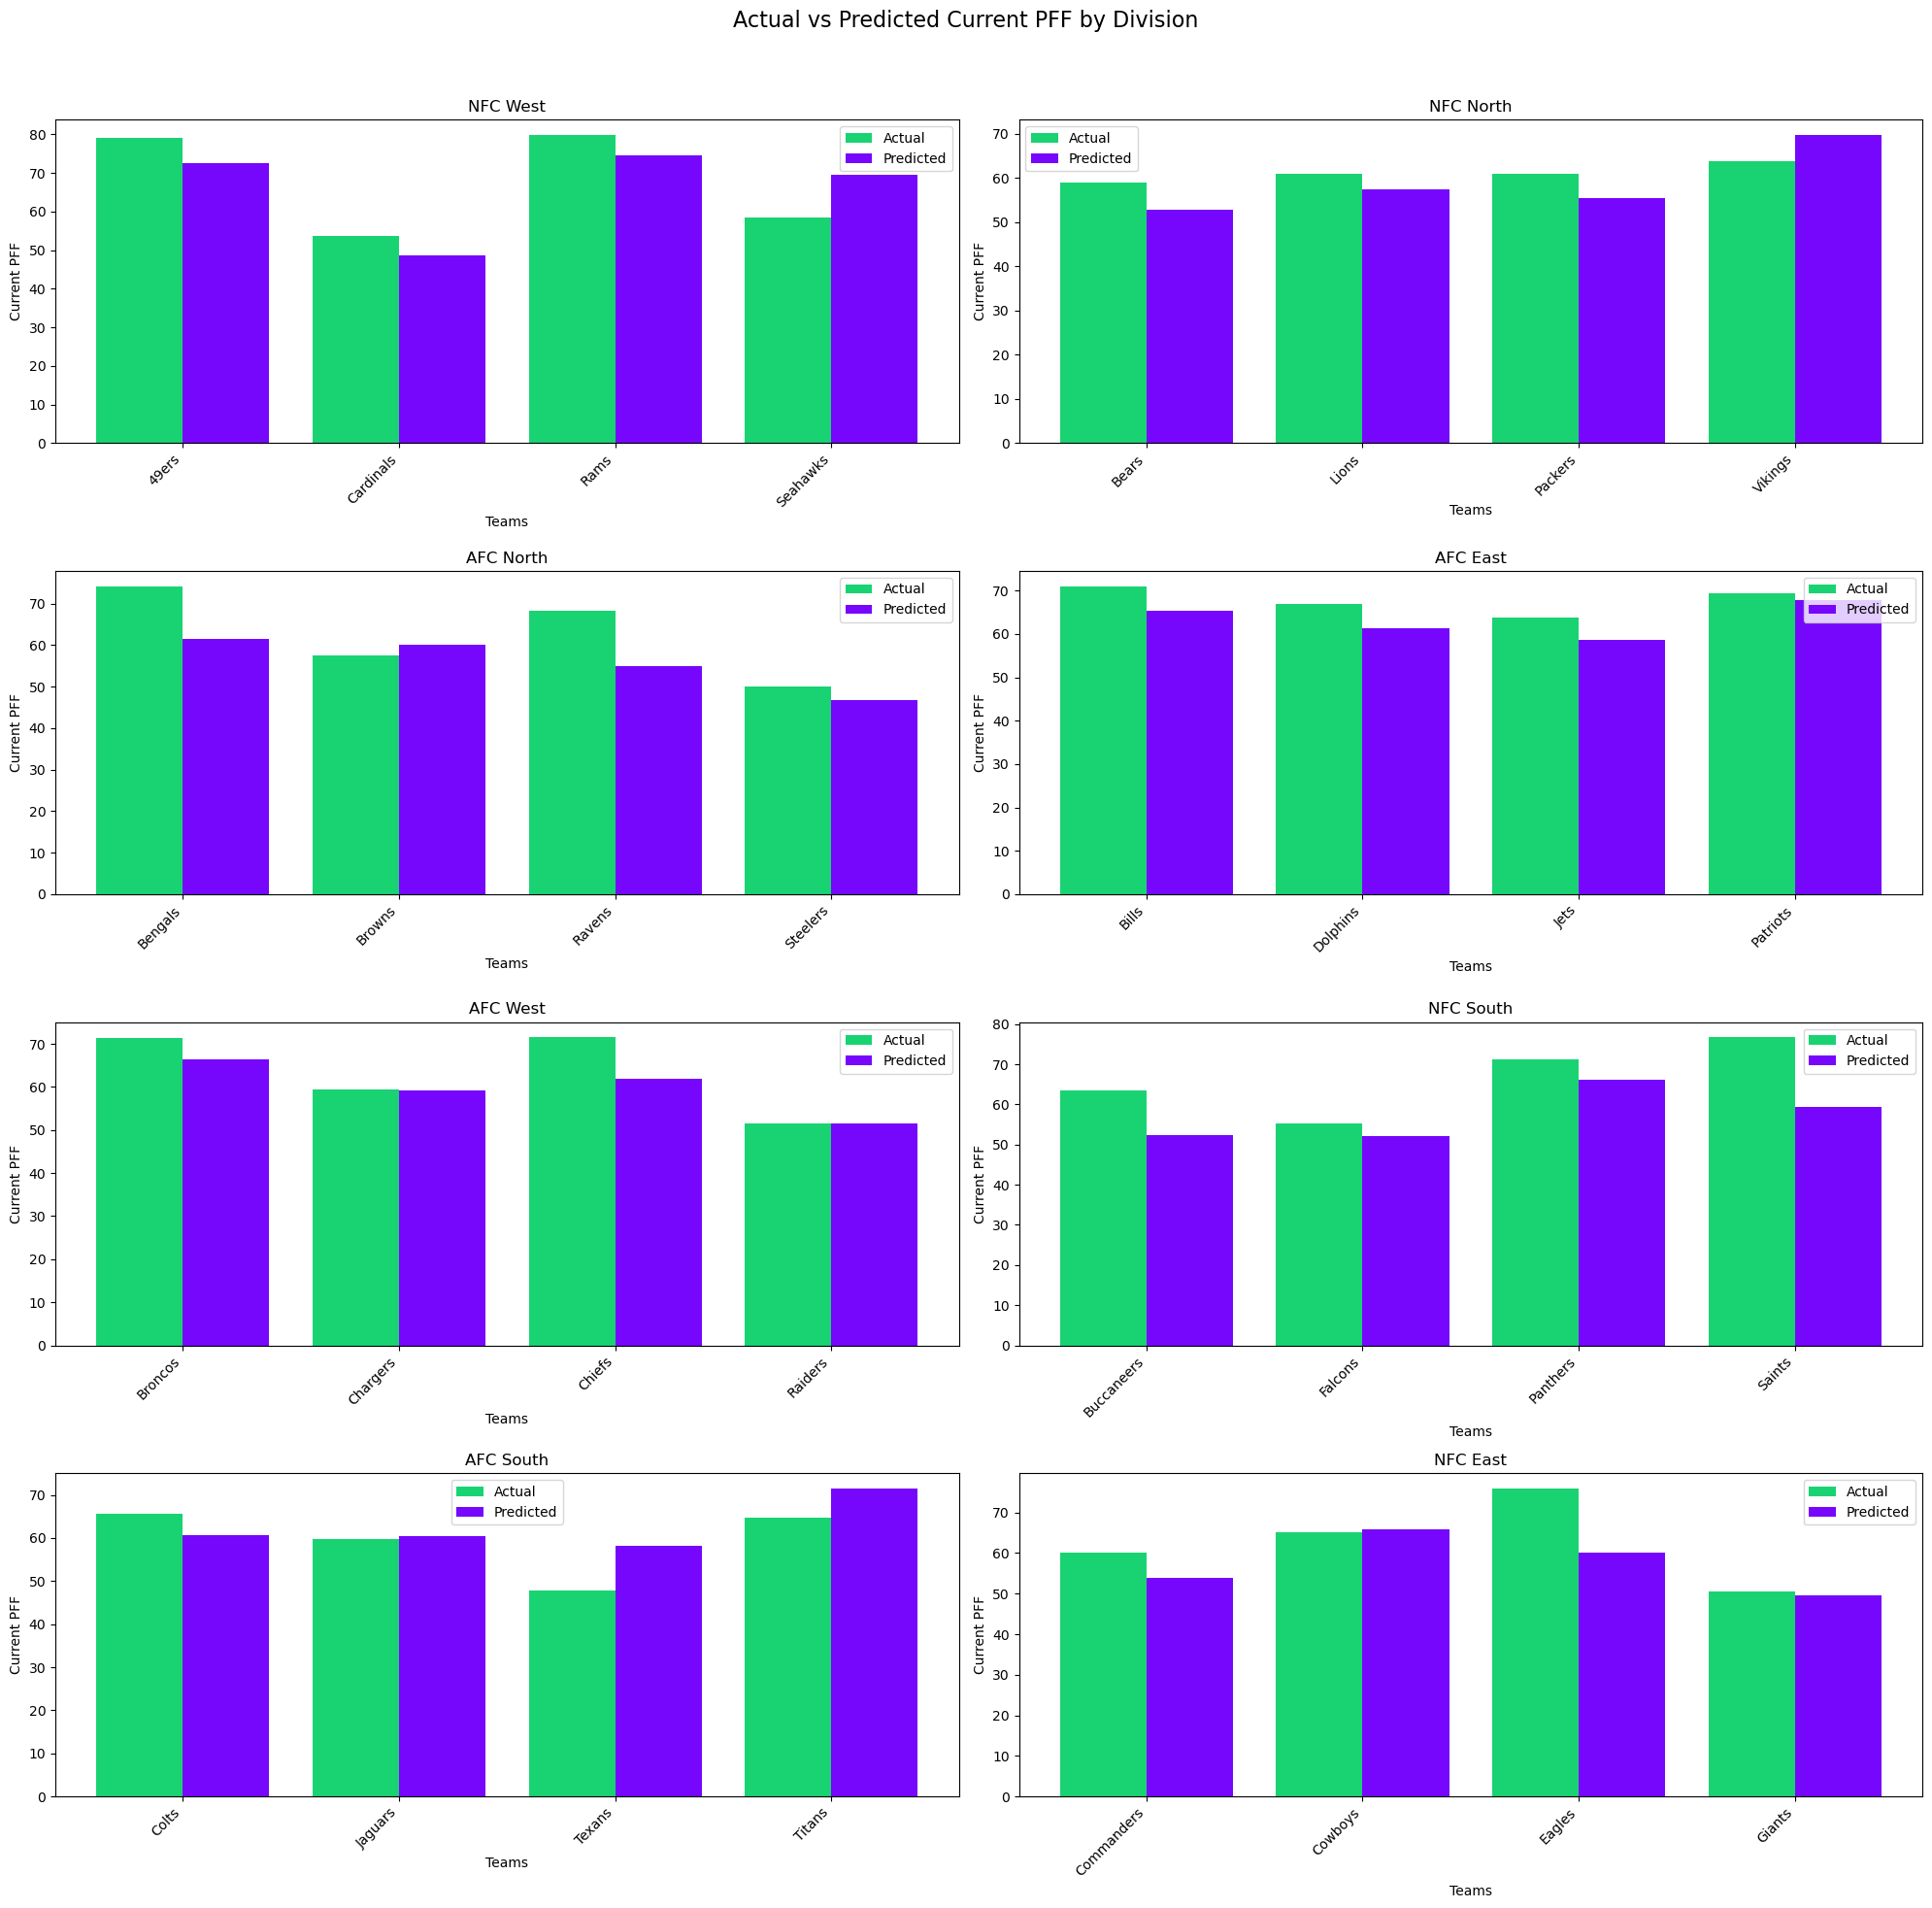

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 87.9291 - val_loss: 113.3801
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.3899 - val_loss: 120.0126
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.2053 - val_loss: 128.6979
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.7202 - val_loss: 105.3070
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67.7496 - val_loss: 100.5813
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.6080 - val_loss: 99.8443
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124.9928 - val_loss: 104.9863
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 105.7239 - val_loss: 134.3316
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.6968 - val_loss: 170.2049
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.1363 - val_loss: 149.5826
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.4350 - val_loss: 125.5268
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50.1

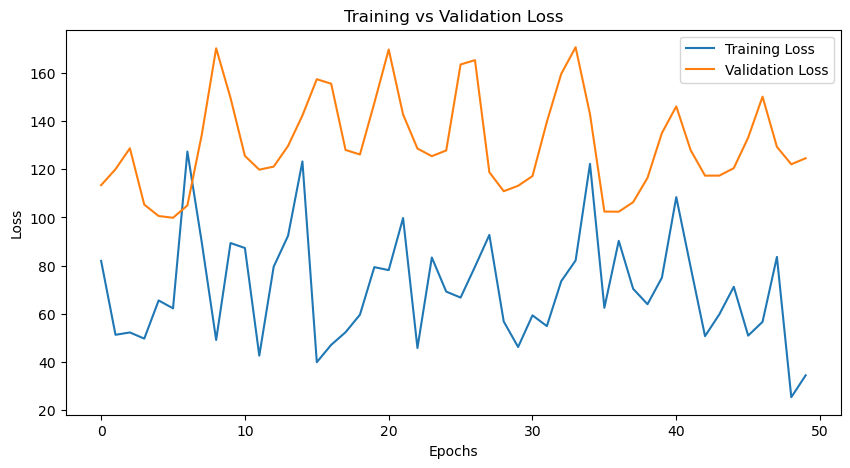

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.4030


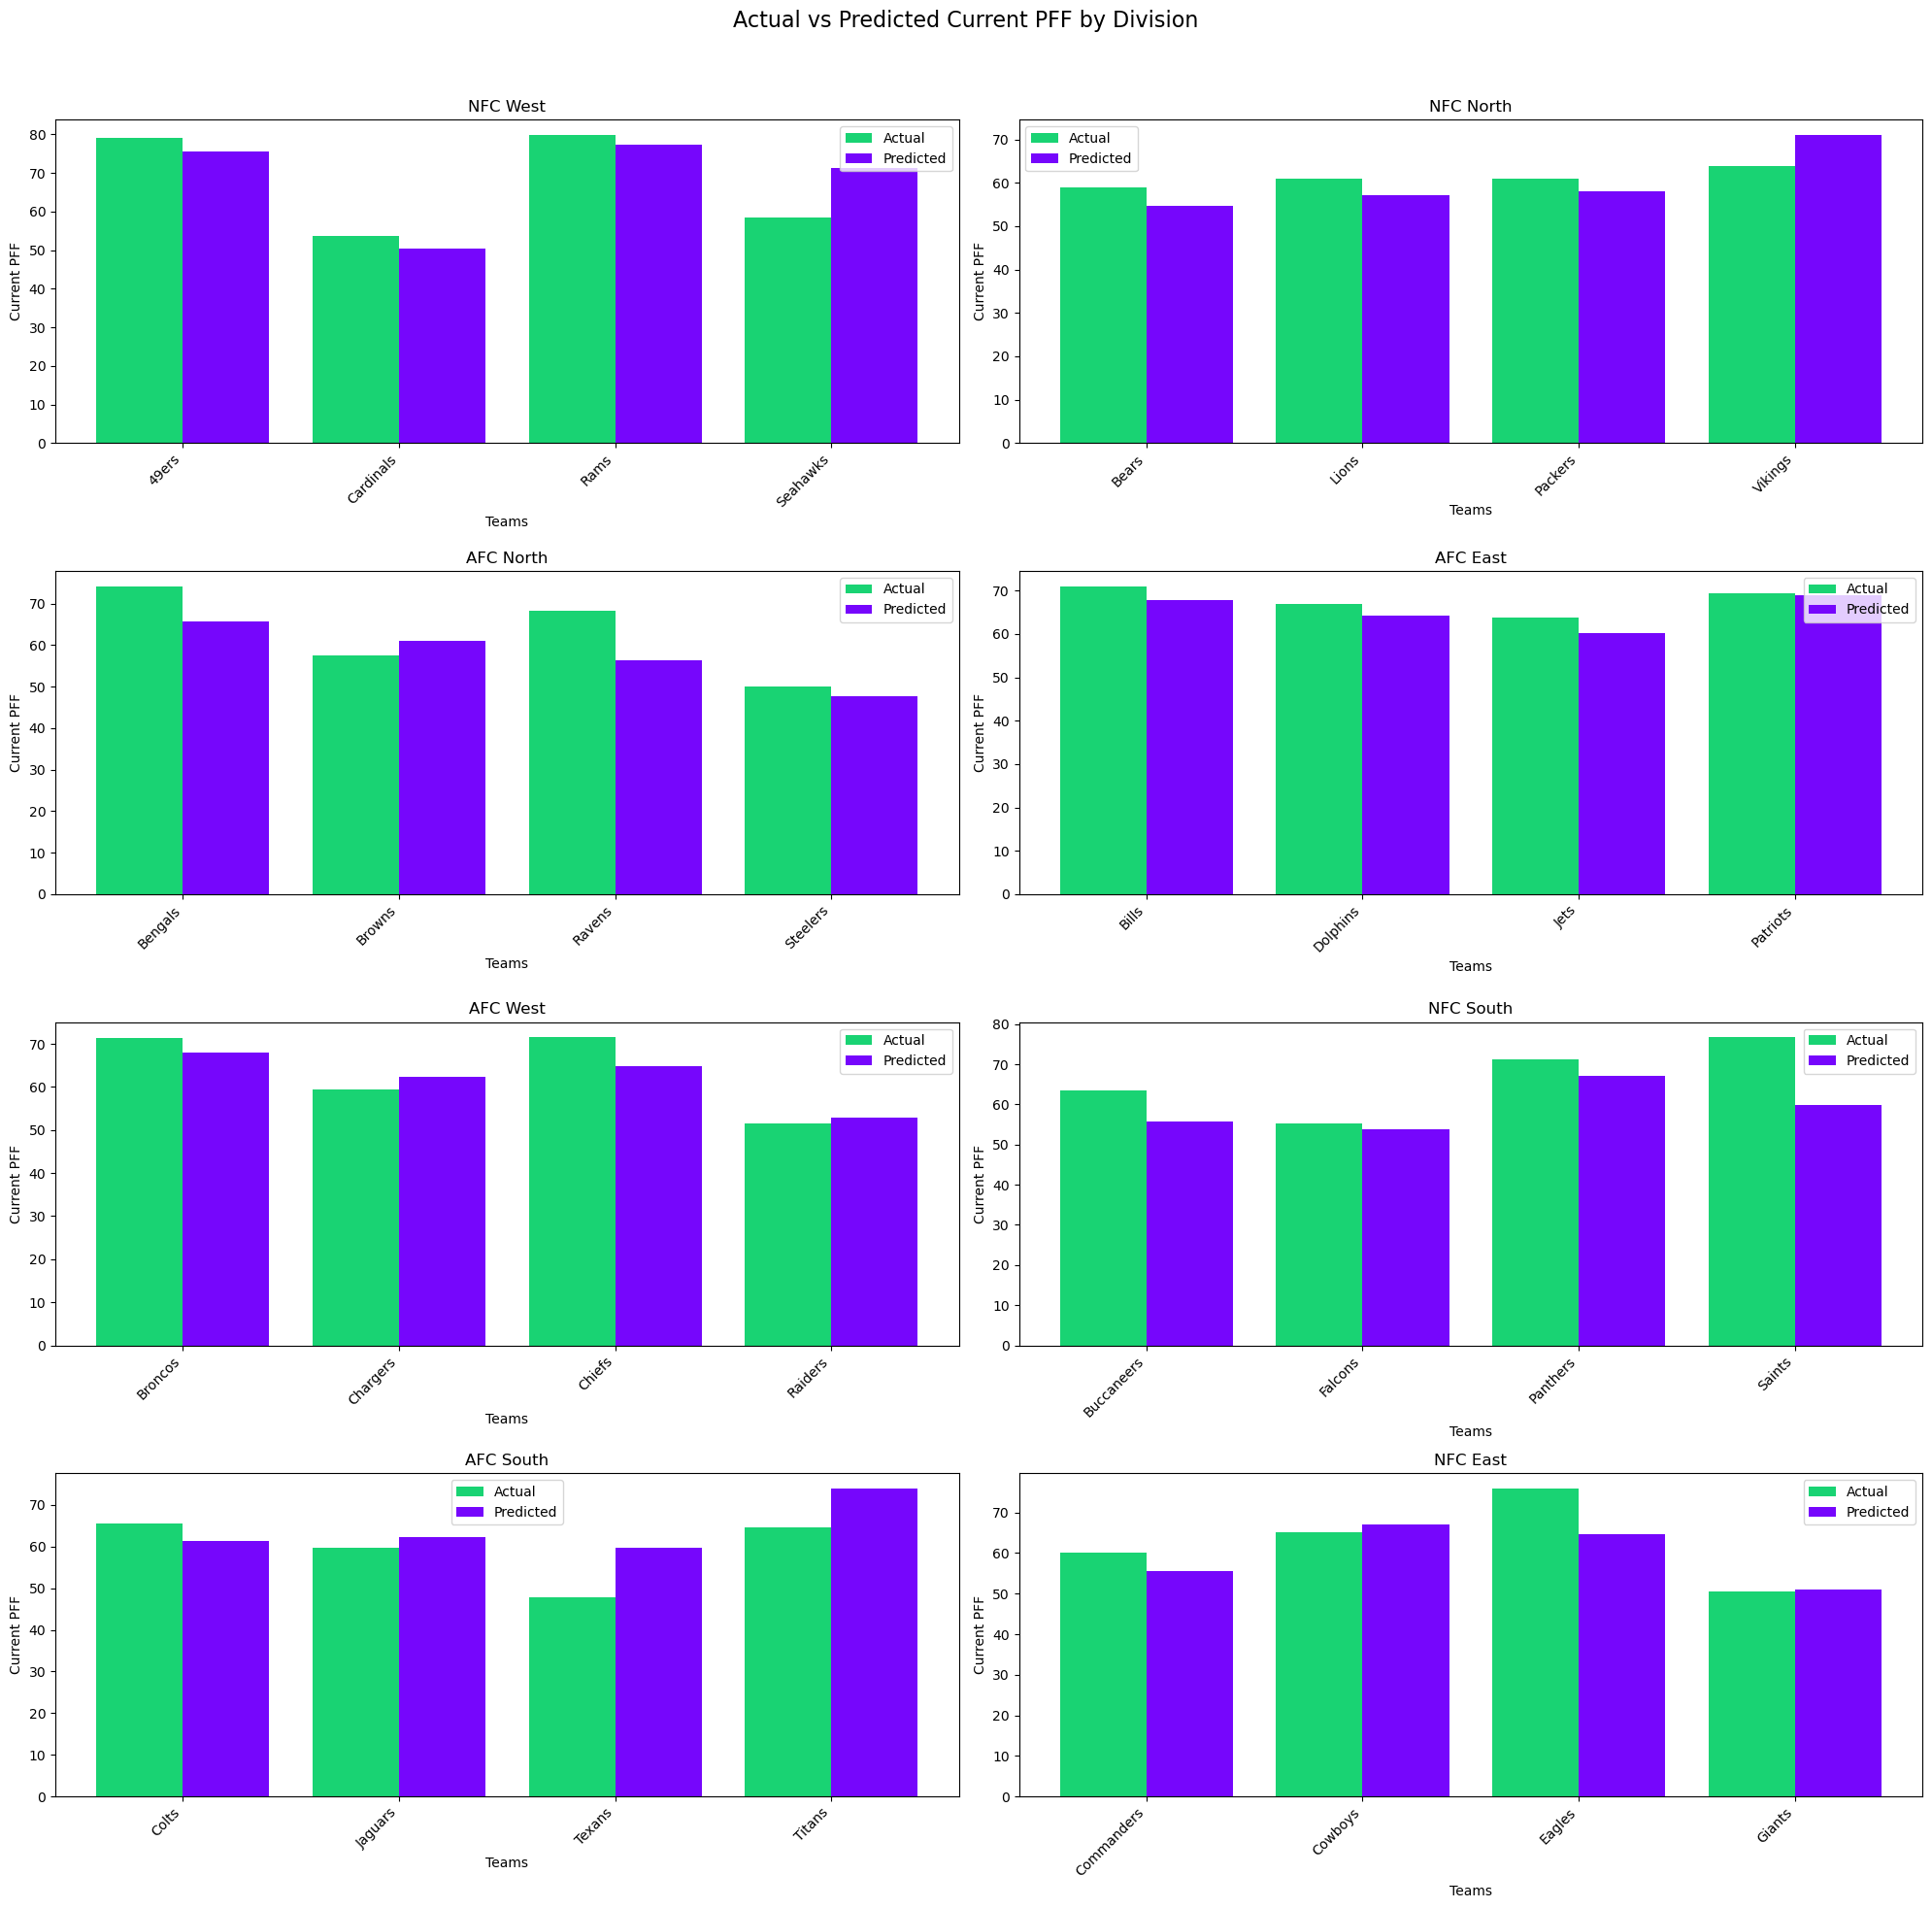

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 47.5653 - val_loss: 130.5449
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96.5361 - val_loss: 144.0663
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75.6270 - val_loss: 183.9106
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 116.0191 - val_loss: 175.2852
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.5788 - val_loss: 132.4628
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.6182 - val_loss: 126.8328
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67.0164 - val_loss: 127.3793
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.3346 - val_loss: 143.3094
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96.4781 - val_loss: 182.6505
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102.8020 - val_loss: 228.5895
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.3214 - val_loss: 246.6376
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

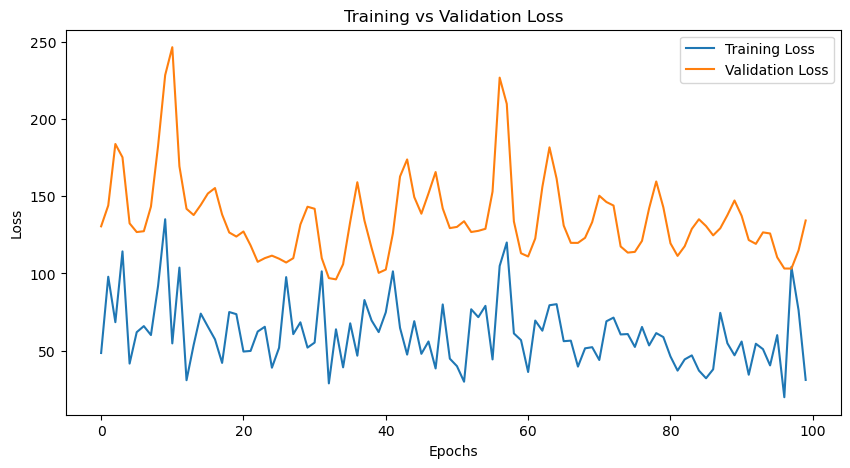

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R² Score: 0.5448


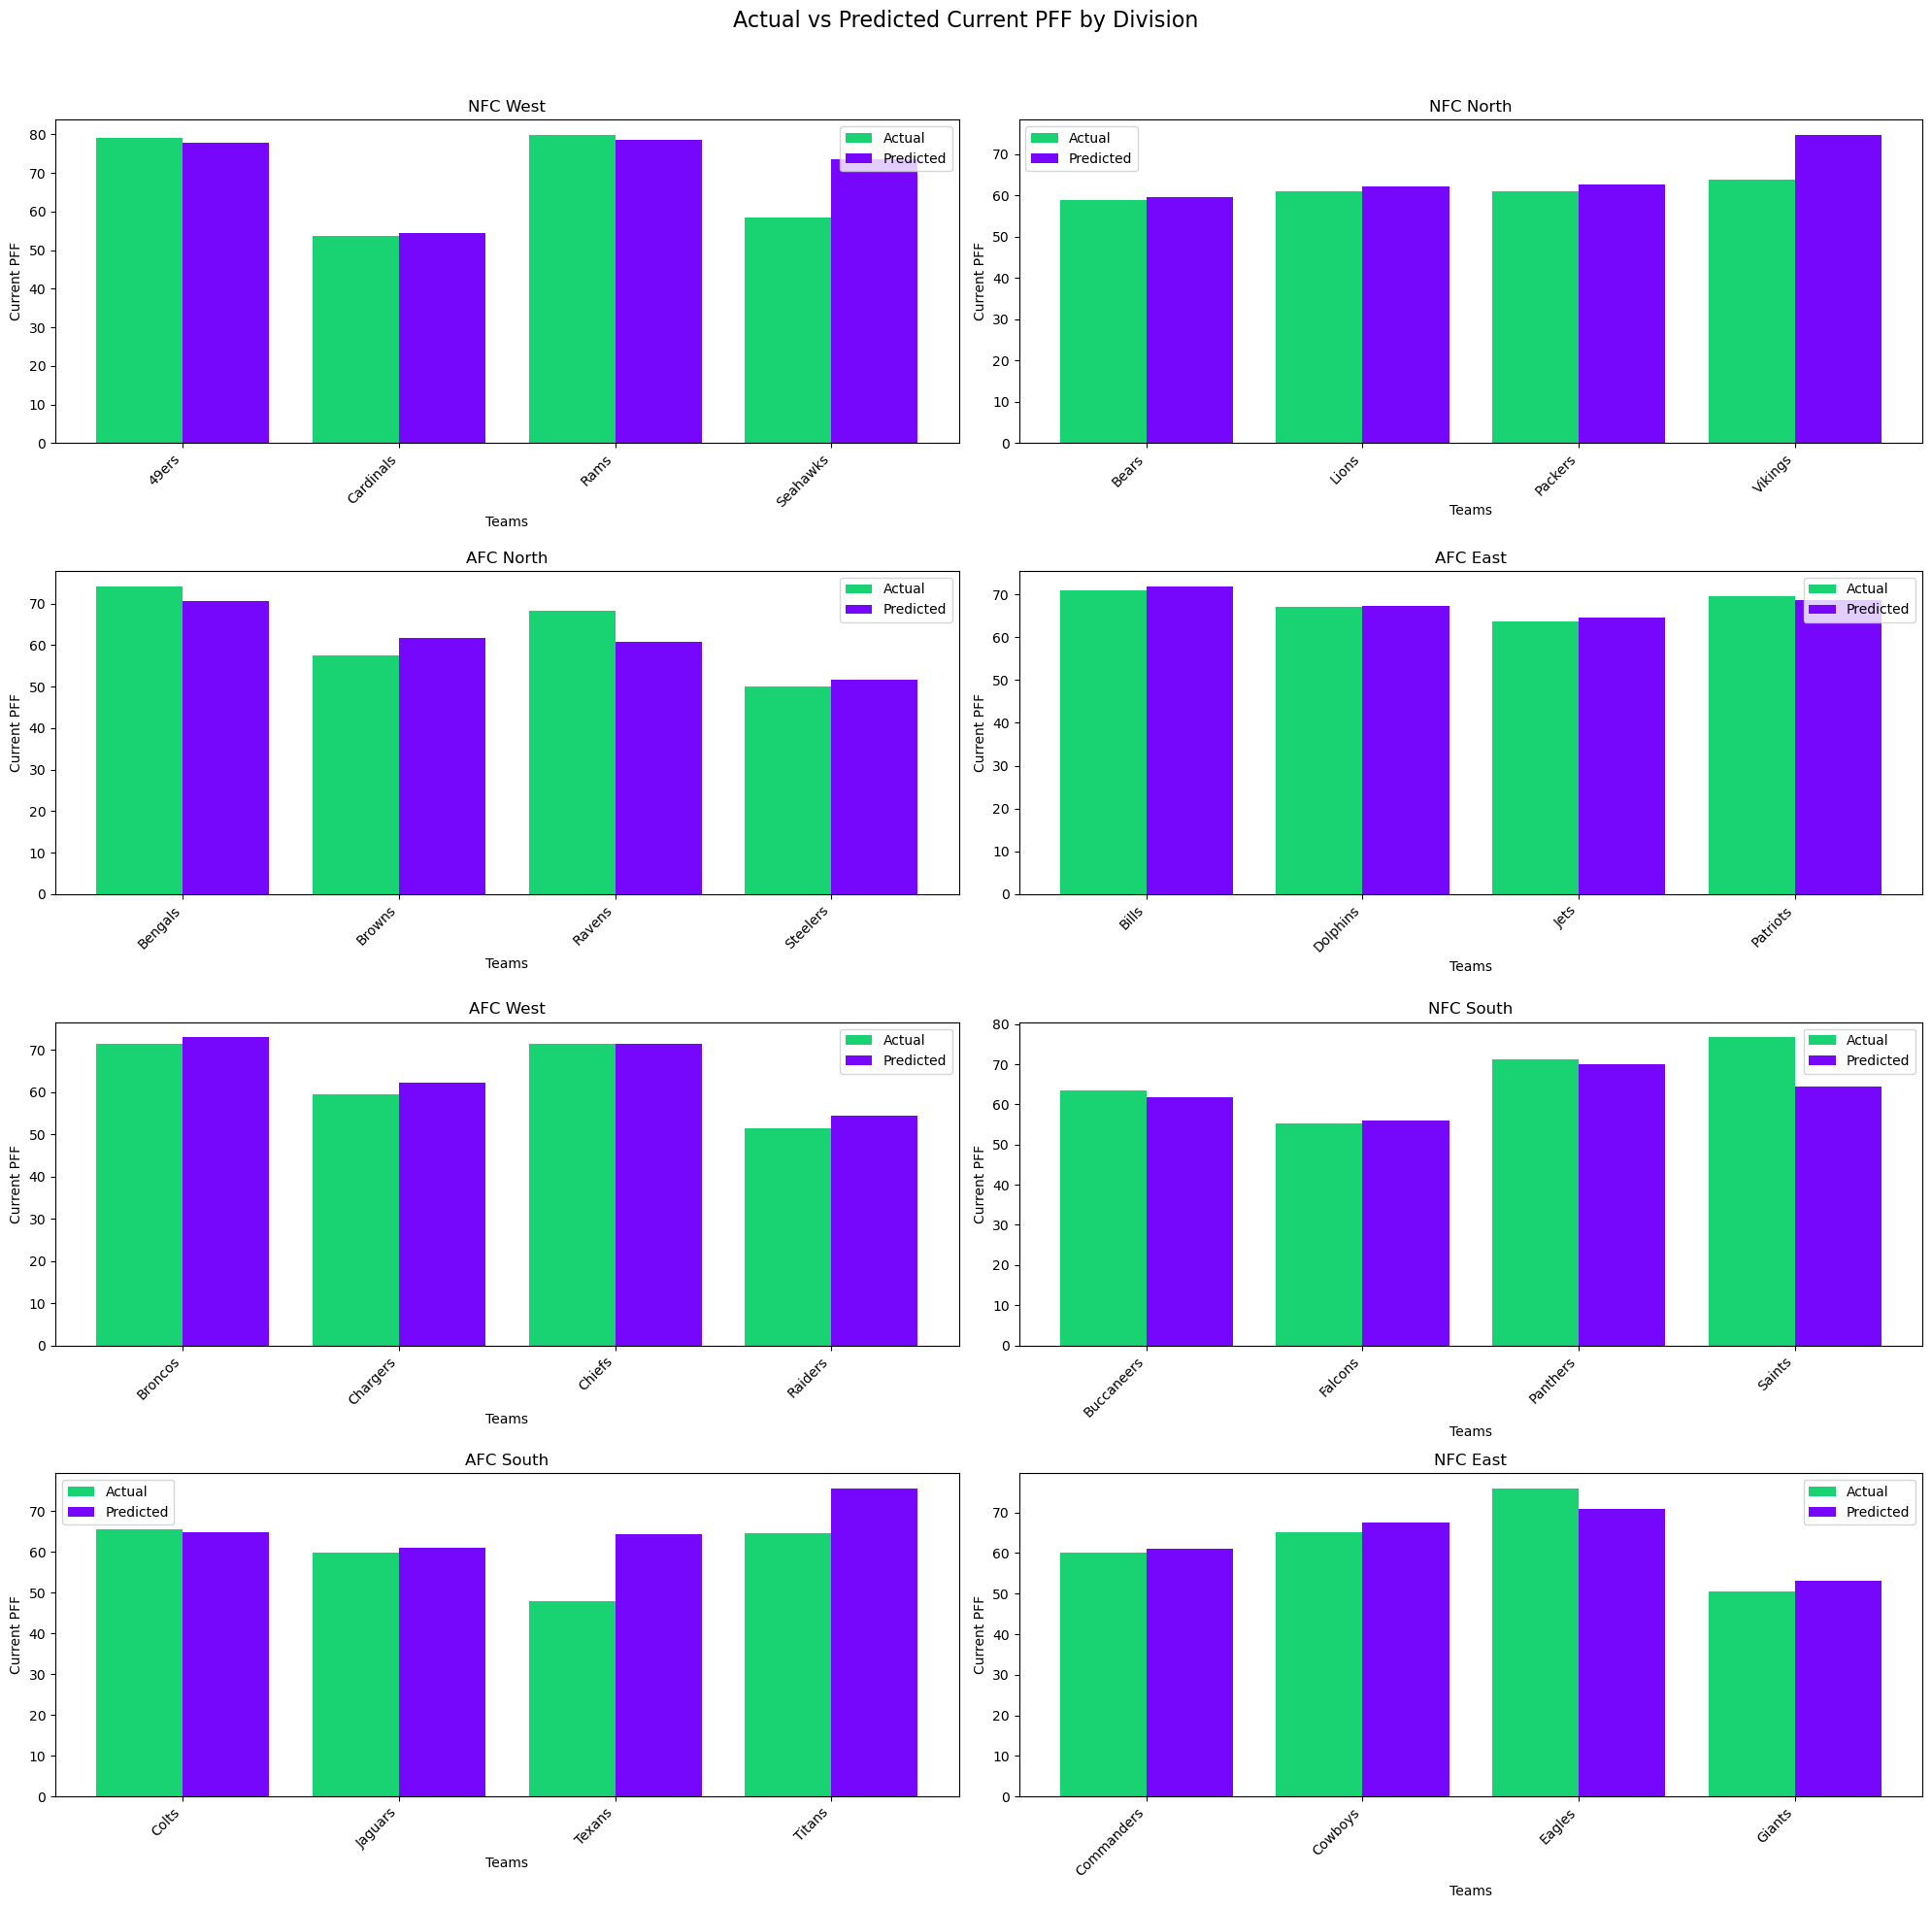

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 75.3570 - val_loss: 137.6860
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37.1681 - val_loss: 137.9589
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.2187 - val_loss: 135.9211
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.0612 - val_loss: 135.0658
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.2951 - val_loss: 150.3562
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.3662 - val_loss: 151.4757
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.9338 - val_loss: 144.0308
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 65.2495 - val_loss: 162.0865
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.3654 - val_loss: 156.6072
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44.3824 - val_loss: 126.9459
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.6400 - val_loss: 121.4125
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

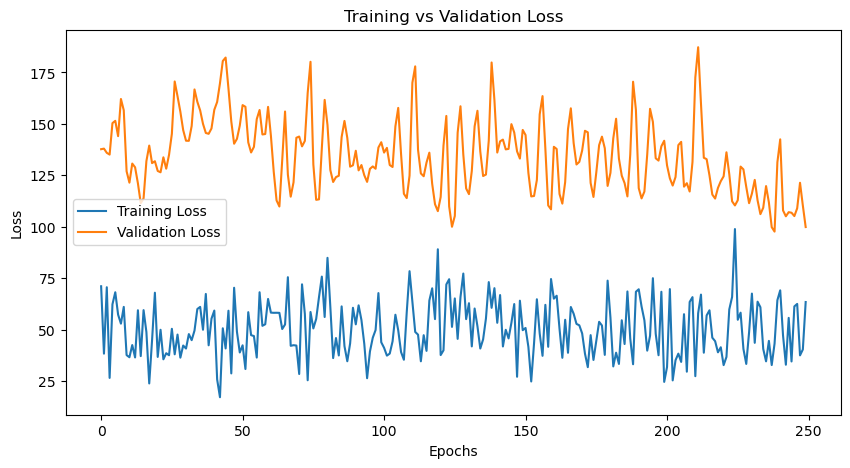

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: 0.5945


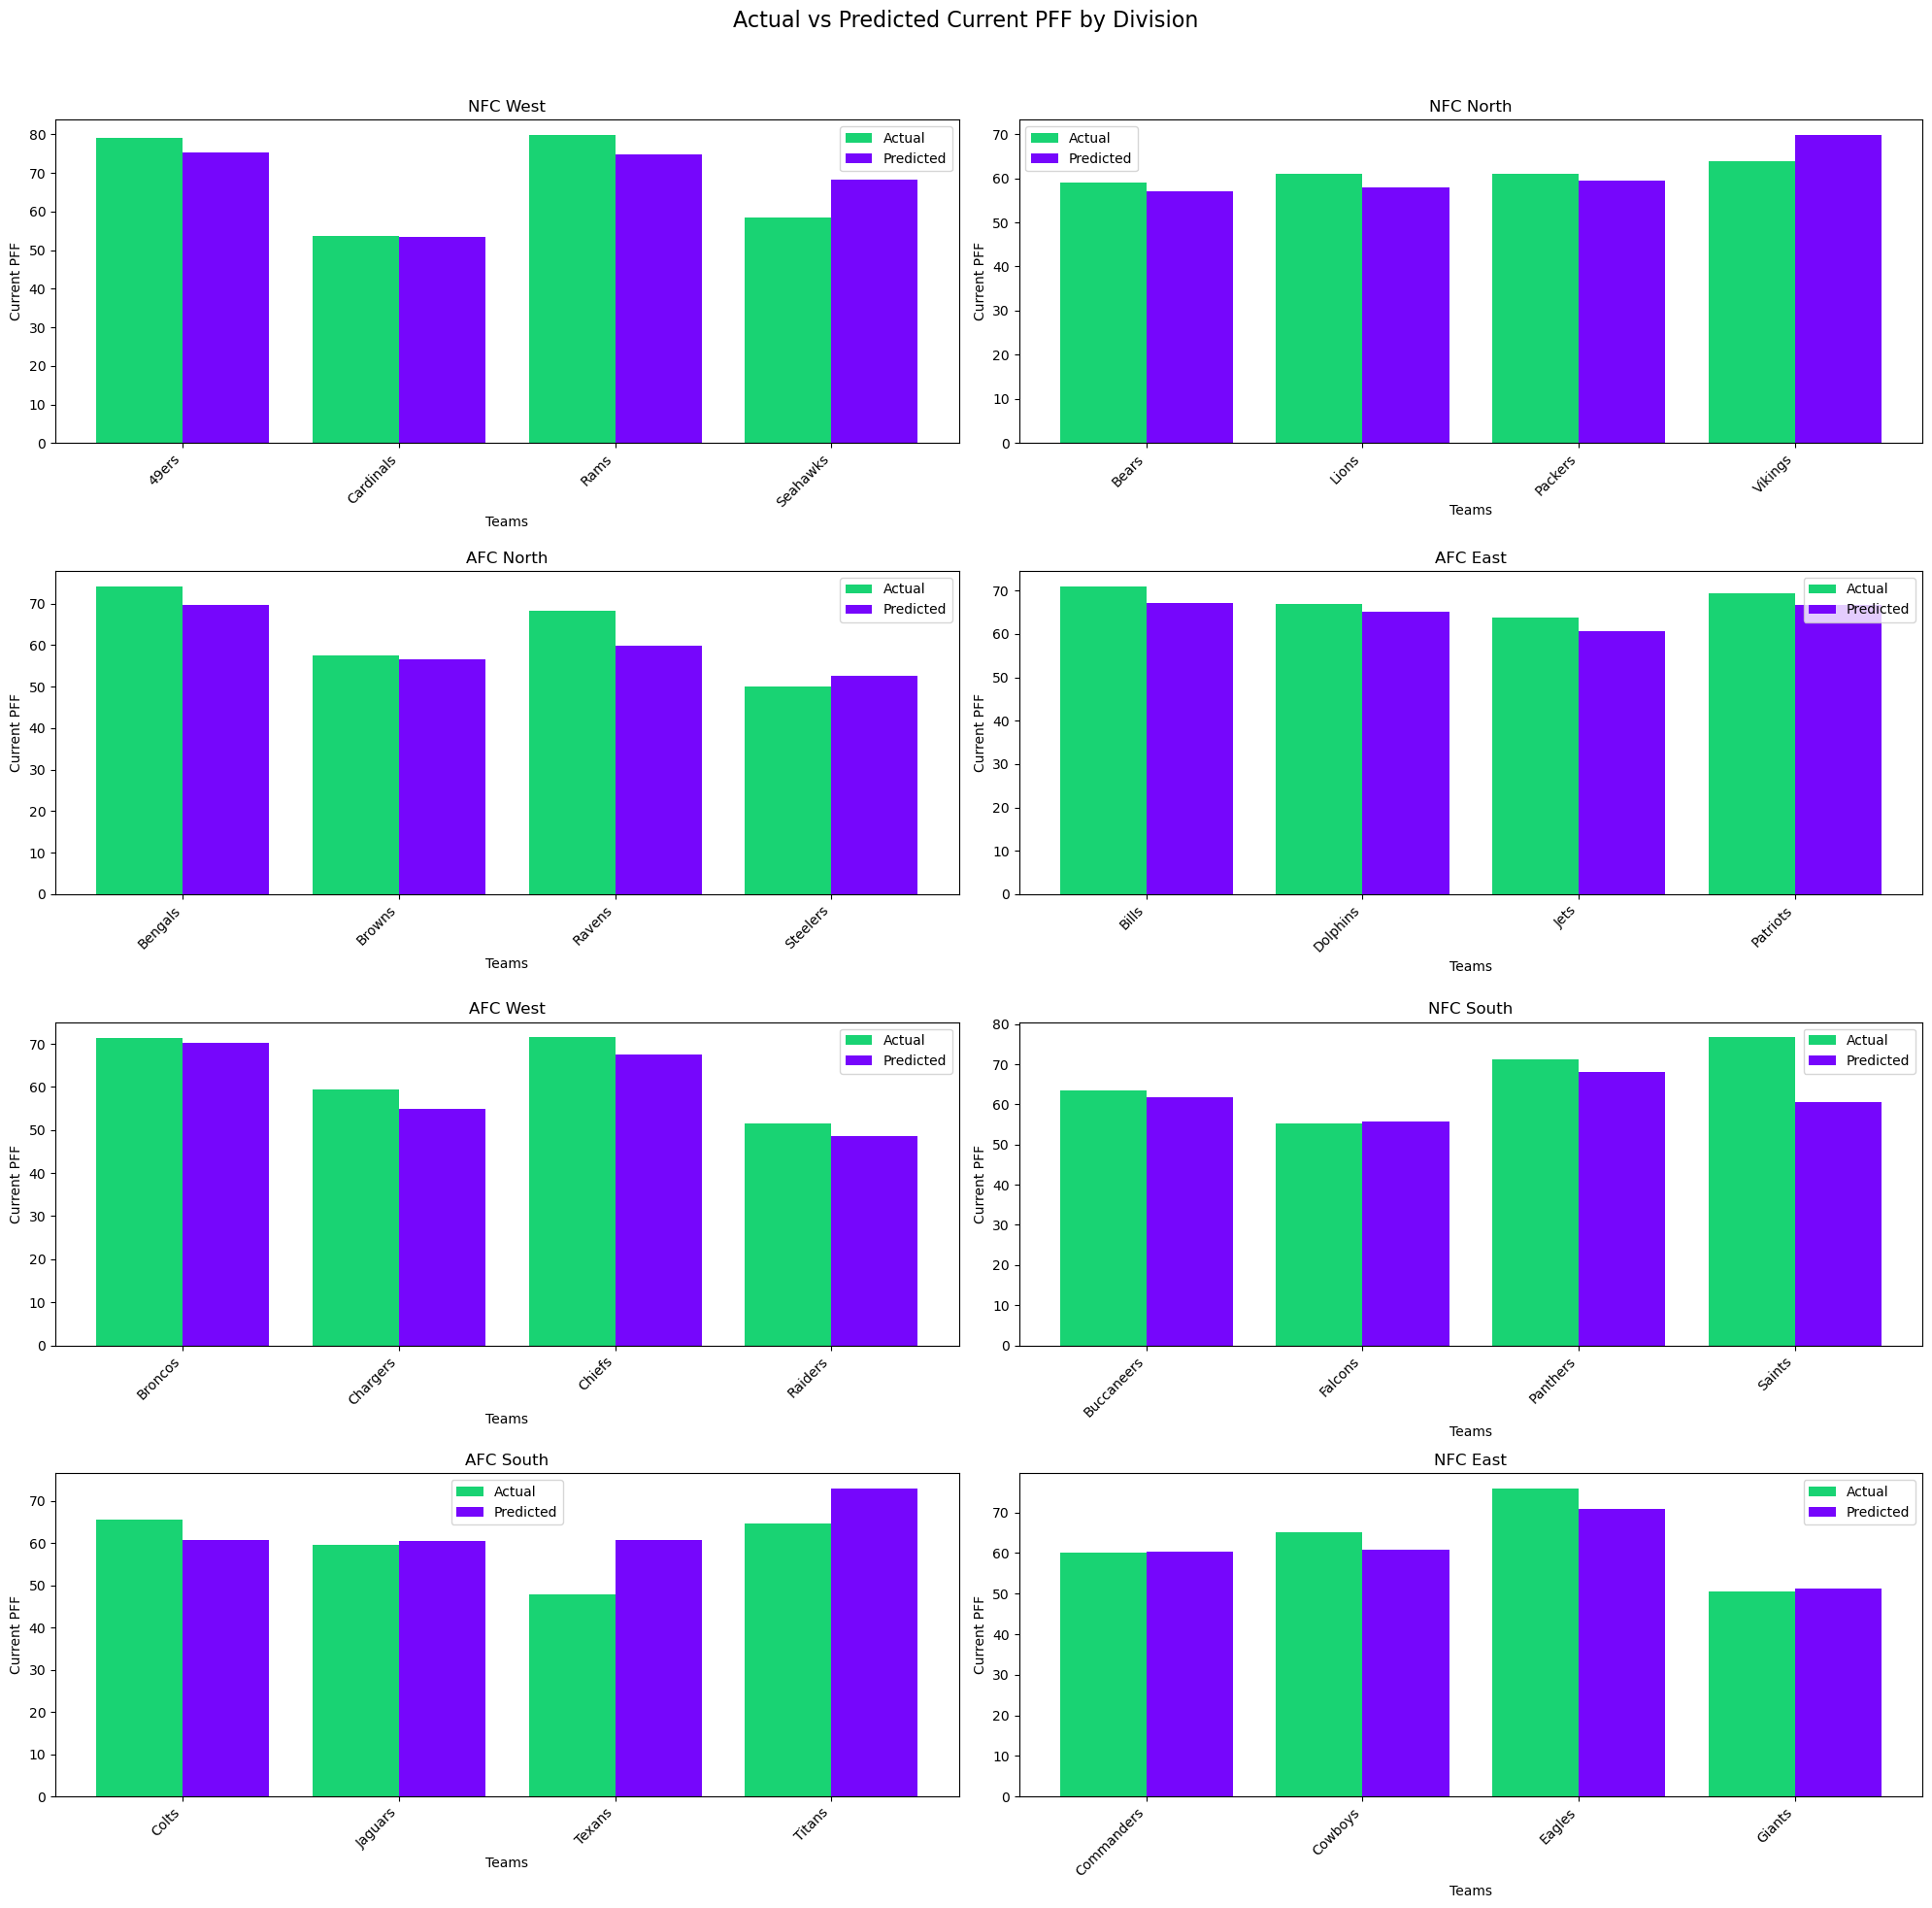

In [50]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    data = lb_df[lb_df['Year'] == 2022].copy()
    data['Predicted_PFF'] = y_pred
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Current_PFF', 'Predicted_PFF', 'Team', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('Actual vs Predicted Current PFF by Division', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Current_PFF'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_PFF'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Current PFF')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()

In [52]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
# Function to prepare data sequences for a given target metric
def prepare_sequences(lb_df, target_metric, sequence_length=3):
    sequences = []
    targets = []
    team_data = lb_df.groupby('Team')

    for team, group in team_data:
        # Ensure the team has enough data
        if len(group) >= sequence_length + 1:
            # Iterate through the data to create sequences
            for i in range(len(group) - sequence_length):
                # Select the relevant columns for the sequence
                sequence = group.iloc[i:i+sequence_length][[
                    'Previous_grades_tackle', 
                    'Previous_AV',
                    'Previous_PFF',
                    'Previous_franchise_id',
                    'Previous_grades_run_defense',
                    'Previous_grades_coverage_defense',
                    'Previous_tackles_for_loss'
                ]]
                
                # The target is the next year's target_metric
                target = group.iloc[i+sequence_length][target_metric]
                
                sequences.append(sequence.values)
                targets.append(target)
    
    # Convert lists to numpy arrays
    X = np.array(sequences)
    y = np.array(targets)
    
    print(f"Total sequences generated for {target_metric}: {len(sequences)}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")
    
    # Reshape X to (samples, timesteps, features)
    X = X.reshape(X.shape[0], sequence_length, -1)
    
    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
    
    return X, y, scaler


In [54]:
# Function to build the model
def build_model(input_shape):
    inputs = Input(shape=input_shape)  # (timesteps, features)
    
    # Add a Dense layer before the attention to create more variability in the input
    dense_input = Dense(16, activation='relu')(inputs)
    
    # Add MultiHeadAttention layer
    attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)
    
    # Add Layer Normalization for stability
    attention_output = LayerNormalization()(attention_output)
    
    # Add RNN layer to capture temporal dependencies
    rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)
    
    # Add Dropout to prevent overfitting
    rnn_output = Dropout(0.2)(rnn_output)
    
    # Output layer for predicting the target metric
    output = Dense(1)(rnn_output)
    
    # Define the model
    model = Model(inputs=inputs, outputs=output)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model


In [55]:
# Function to train and evaluate the model
def train_and_evaluate(X, y, target_metric, epochs_list, batch_size=8):
    input_shape = (X.shape[1], X.shape[2])  # (timesteps, features)
    model = build_model(input_shape)
    
    for e in epochs_list:
        print(f"\nTraining {target_metric} with {e} epochs...")
        history = model.fit(
            X, y, 
            epochs=e, 
            batch_size=batch_size, 
            validation_split=0.2, 
            verbose=1
        )
        
        # Plot training & validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training vs Validation Loss for {target_metric} - {e} Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Make predictions on the entire dataset (you might want to separate into train/test)
        y_pred = model.predict(X)
        
        # Calculate R² score
        r2 = r2_score(y, y_pred)
        print(f"R² Score for {target_metric} after {e} epochs: {r2:.4f}")
        
        # Plot actual vs predicted values
        plt.figure(figsize=(10, 5))
        plt.scatter(range(len(y)), y, label='Actual', color='blue', alpha=0.5)
        plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red', alpha=0.5)
        plt.title(f'Actual vs Predicted {target_metric} after {e} Epochs')
        plt.xlabel('Samples')
        plt.ylabel(target_metric)
        plt.legend()
        plt.show()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


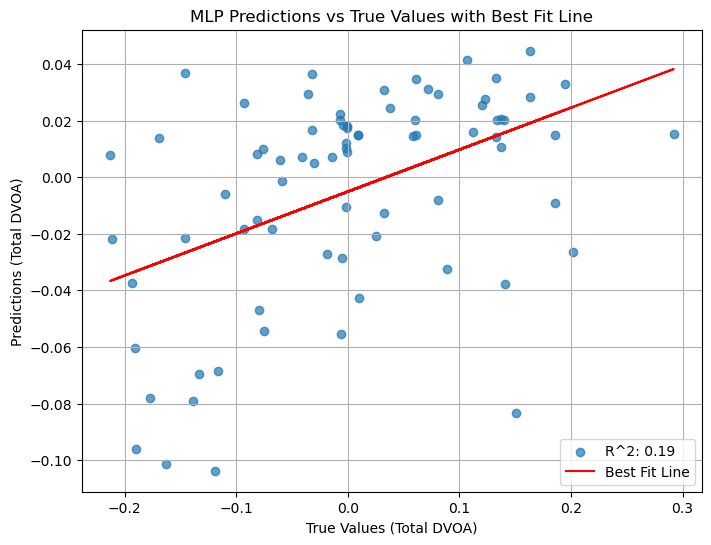

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Combined_Secondary_Defense.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path)

# Preprocessing
data['Total DVOA'] = data['Total DVOA'].str.rstrip('%').astype(float) / 100  # Convert percentages to decimals
data = data.dropna(subset=['Current_PFF', 'Net EPA'])  # Drop rows with missing values

# Add more features
X = data[['Current_PFF']].values  # Example features
y = data[['Net EPA']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build an enhanced MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Add dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output for regression
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Lower learning rate
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, 
                    validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Compute R^2 score
r2 = r2_score(y_test, y_pred)

# Scatter plot with predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label=f'R^2: {r2:.2f}')

# Line of best fit
m, b = np.polyfit(y_test.flatten(), y_pred.flatten(), 1)  # Linear fit
plt.plot(y_test, m * y_test + b, color='red', label='Best Fit Line')

# Plot formatting
plt.xlabel('True Values (Total DVOA)')
plt.ylabel('Predictions (Total DVOA)')
plt.title('MLP Predictions vs True Values with Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()



First few rows of the DataFrame:
      Team  Year Position  Value_cap_space  Value_draft_data  Current_AV  \
17   49ers  2019       DL        15.903294       1400.696696        53.0   
49   49ers  2019       LB        15.993624        146.484990        28.0   
81   49ers  2019       DB        15.313496        270.589442        35.0   
114  49ers  2020       DL         6.755802       1402.398565        39.0   
146  49ers  2020       LB         2.991927        144.514132        34.0   

     Current_PFF Total DVOA  win-loss-pct  Net EPA  ...  \
17     76.896506     27.90%        0.8125    0.216  ...   
49     63.131934     27.90%        0.8125    0.216  ...   
81     74.600742     27.90%        0.8125    0.216  ...   
114    60.632050      5.40%        0.3750    0.025  ...   
146    73.581955      5.40%        0.3750    0.025  ...   

     Previous_snap_counts_pass_rush  Previous_snap_counts_run_defense  \
17                       327.077444                        217.831236   
49       

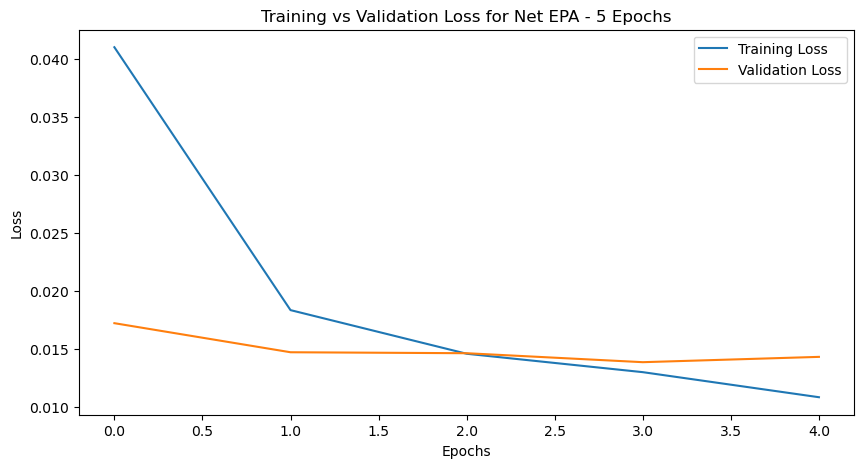

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/stepWARNING:tensorflow:5 out of the last 14 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3065bd120> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
R² Score for Net EPA after 5 epochs: 0.1412
MAE for Net EPA after 5 epochs: 0.0997
RMSE for Net EPA after 5 epochs: 0.1177


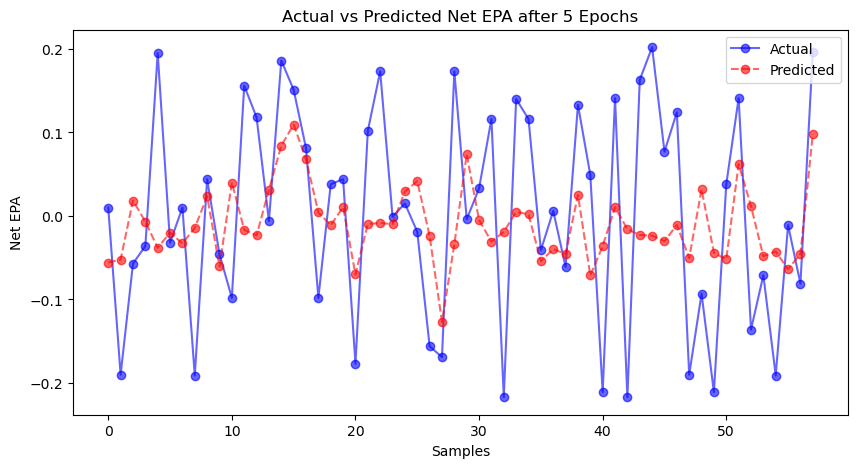


Training Net EPA with 10 epochs...
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121 - val_loss: 0.0138
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0116 - val_loss: 0.0144
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0090 - val_loss: 0.0136
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0090 - val_loss: 0.0135
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081 - val_loss: 0.0132
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0092 - val_loss: 0.0132
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087 - val_loss: 0.0133
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077 - val_loss: 0.0129
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 - val_loss: 0.0132
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 - val_loss: 0.0133


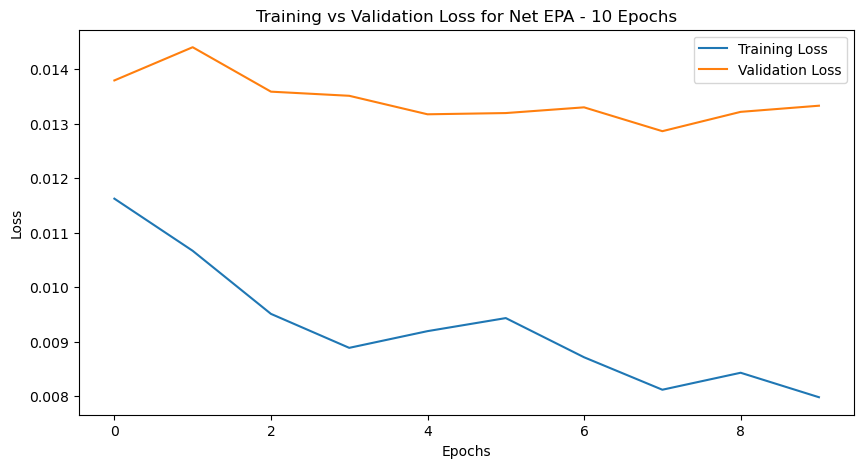

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
R² Score for Net EPA after 10 epochs: 0.2031
MAE for Net EPA after 10 epochs: 0.0964
RMSE for Net EPA after 10 epochs: 0.1134


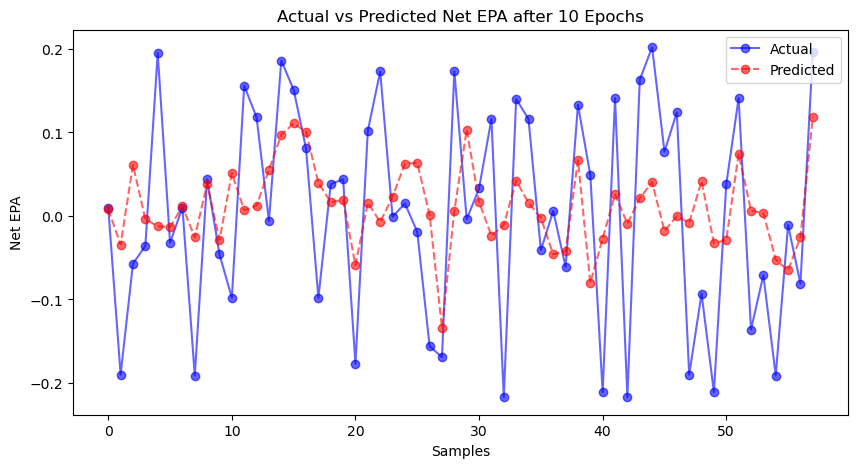


Training Net EPA with 15 epochs...
Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087 - val_loss: 0.0137
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0086 - val_loss: 0.0130
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - val_loss: 0.0127
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - val_loss: 0.0126
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - val_loss: 0.0133
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - val_loss: 0.0142
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 - val_loss: 0.0125
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 - val_loss: 0.0119
Epoch 9/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - val_loss: 0.0127
Epoch 10/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - val_loss: 0.0127
Epoch 11/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058 - val_loss: 0.0122
Epoch 12/15
29/29 ━━━━━━━━━━━━━━━━━━━━

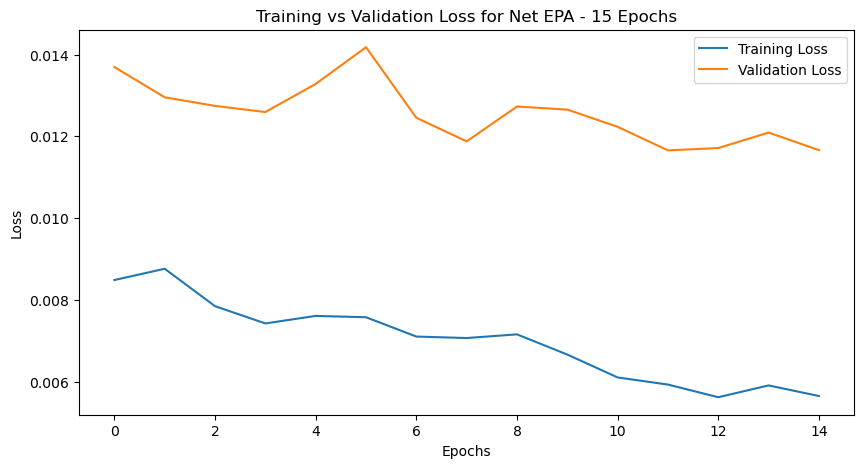

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 15 epochs: 0.2777
MAE for Net EPA after 15 epochs: 0.0910
RMSE for Net EPA after 15 epochs: 0.1080


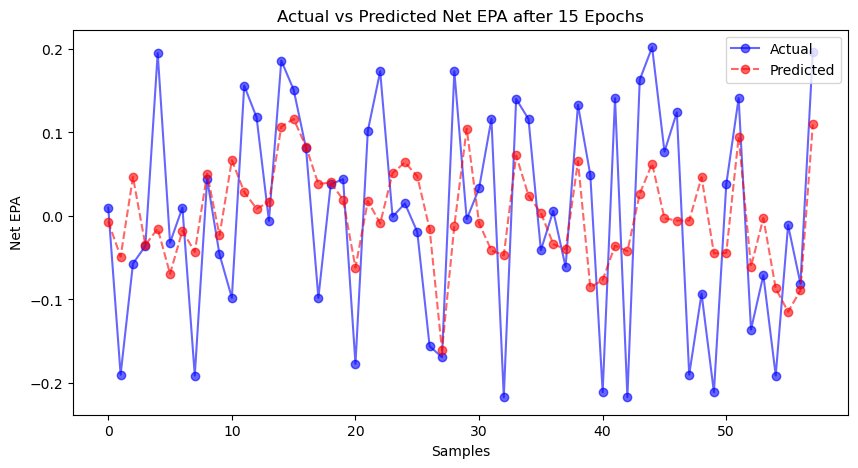


Training Net EPA with 20 epochs...
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059 - val_loss: 0.0121
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - val_loss: 0.0124
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - val_loss: 0.0119
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051 - val_loss: 0.0123
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0052 - val_loss: 0.0115
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - val_loss: 0.0111
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - val_loss: 0.0115
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050 - val_loss: 0.0111
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 - val_loss: 0.0132
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - val_loss: 0.0109
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - val_loss: 0.0111
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━

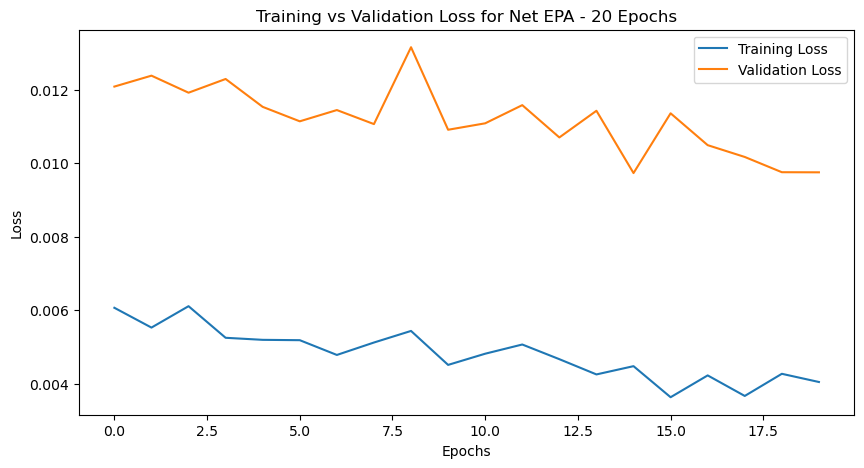

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step
R² Score for Net EPA after 20 epochs: 0.3969
MAE for Net EPA after 20 epochs: 0.0817
RMSE for Net EPA after 20 epochs: 0.0987


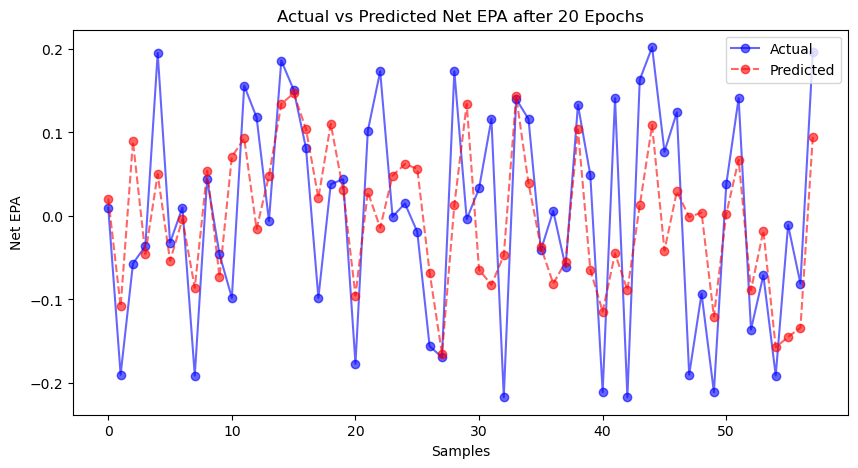


Training Net EPA with 25 epochs...
Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0111
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0102
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0097
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036 - val_loss: 0.0107
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0097
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0114
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - val_loss: 0.0108
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0106
Epoch 9/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 0.0098
Epoch 10/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 - val_loss: 0.0103
Epoch 11/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0109
Epoch 12/25
29/29 ━━━━━━━━━━━━━━━━━━━━

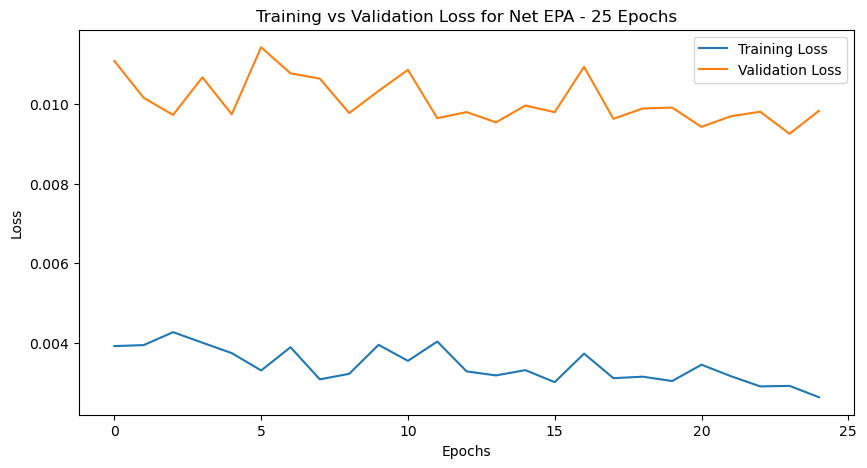

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step
R² Score for Net EPA after 25 epochs: 0.4268
MAE for Net EPA after 25 epochs: 0.0781
RMSE for Net EPA after 25 epochs: 0.0962


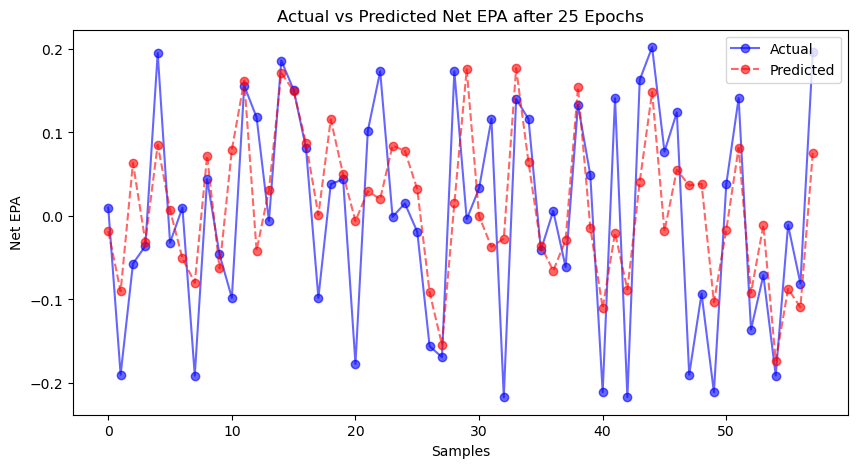


Training Net EPA with 30 epochs...
Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - val_loss: 0.0091
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0090
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0092
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - val_loss: 0.0099
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0094
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0093
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - val_loss: 0.0095
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028 - val_loss: 0.0094
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0096
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - val_loss: 0.0098
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - val_loss: 0.0091
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━

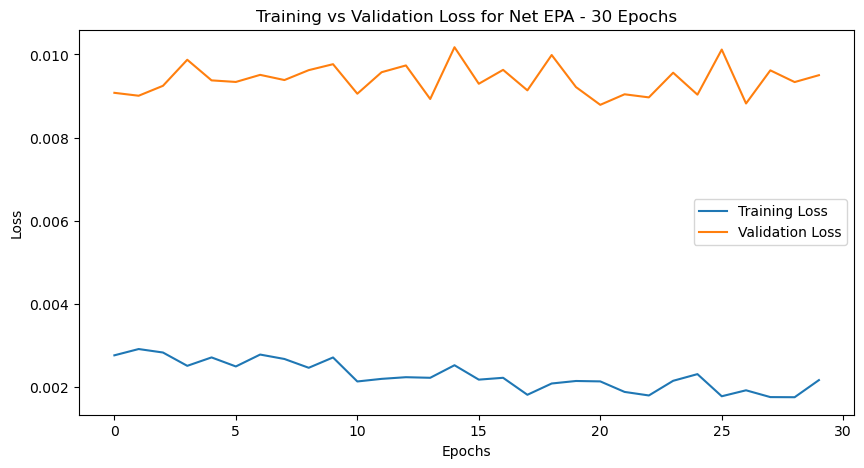

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step
R² Score for Net EPA after 30 epochs: 0.4556
MAE for Net EPA after 30 epochs: 0.0755
RMSE for Net EPA after 30 epochs: 0.0937


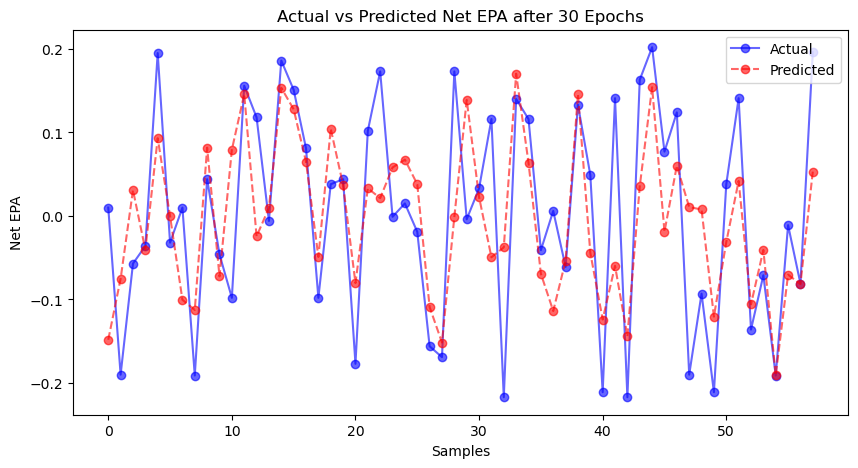


Training Net EPA with 50 epochs...
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - val_loss: 0.0091
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - val_loss: 0.0090
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0086
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 - val_loss: 0.0096
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - val_loss: 0.0097
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - val_loss: 0.0087
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 0.0087
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - val_loss: 0.0084
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0094
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0089
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0094
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━

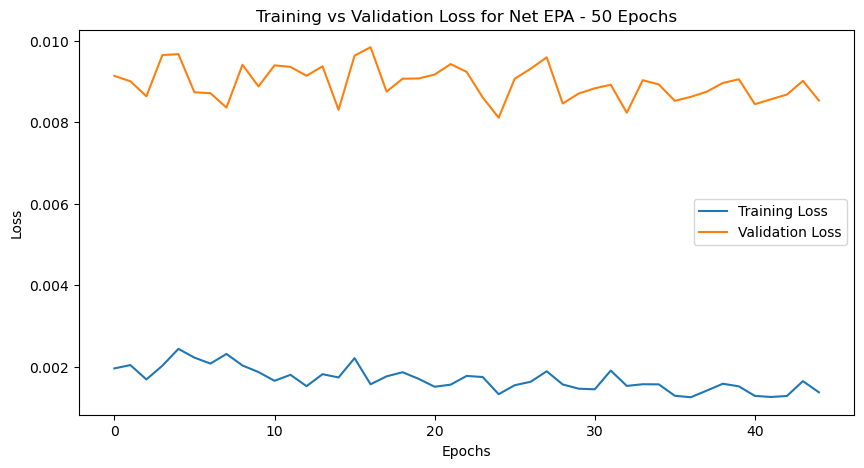

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 50 epochs: 0.4977
MAE for Net EPA after 50 epochs: 0.0709
RMSE for Net EPA after 50 epochs: 0.0900


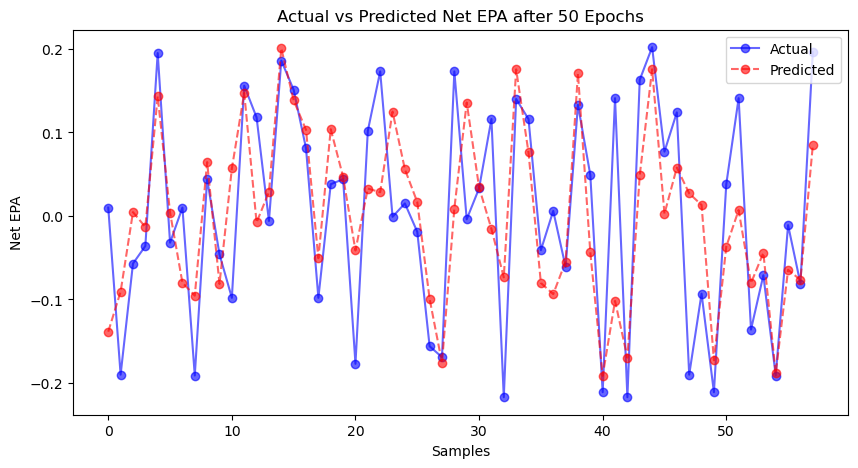


Training Net EPA with 100 epochs...
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0081
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 - val_loss: 0.0085
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - val_loss: 0.0092
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 0.0083
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0082
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0087
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 0.0087
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - val_loss: 0.0090
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0094
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0088
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0088
Epoch 12/100
29/29 ━━━━━━━

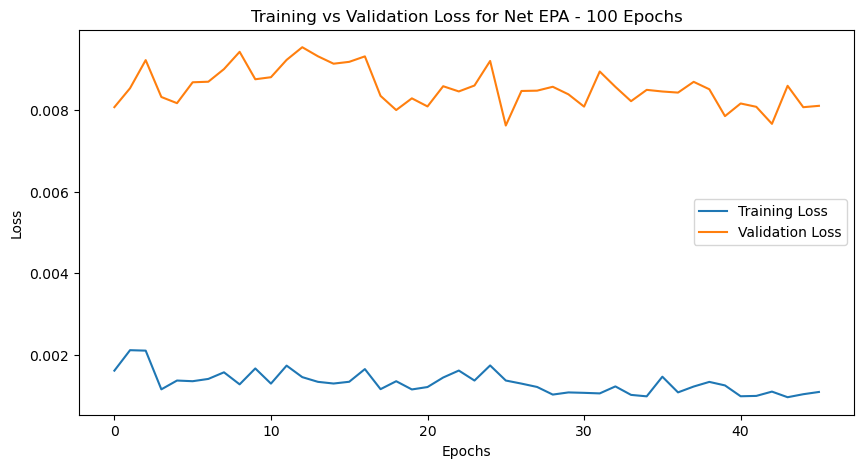

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 100 epochs: 0.5276
MAE for Net EPA after 100 epochs: 0.0692
RMSE for Net EPA after 100 epochs: 0.0873


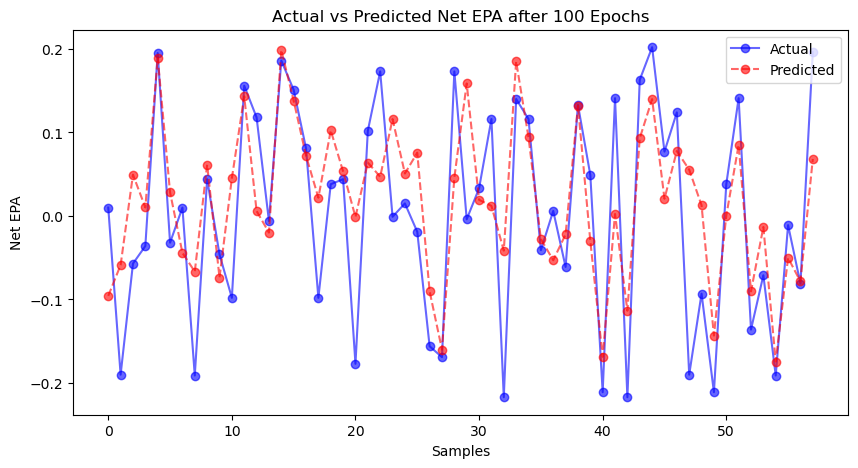


Training Net EPA with 250 epochs...
Epoch 1/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - val_loss: 0.0097
Epoch 2/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 - val_loss: 0.0084
Epoch 3/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0088
Epoch 4/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0088
Epoch 5/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 0.0093
Epoch 6/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0086
Epoch 7/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0080
Epoch 8/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7402e-04 - val_loss: 0.0078
Epoch 9/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 - val_loss: 0.0078
Epoch 10/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 - val_loss: 0.0080
Epoch 11/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0083
Epoch 12/250
29/29 ━━━

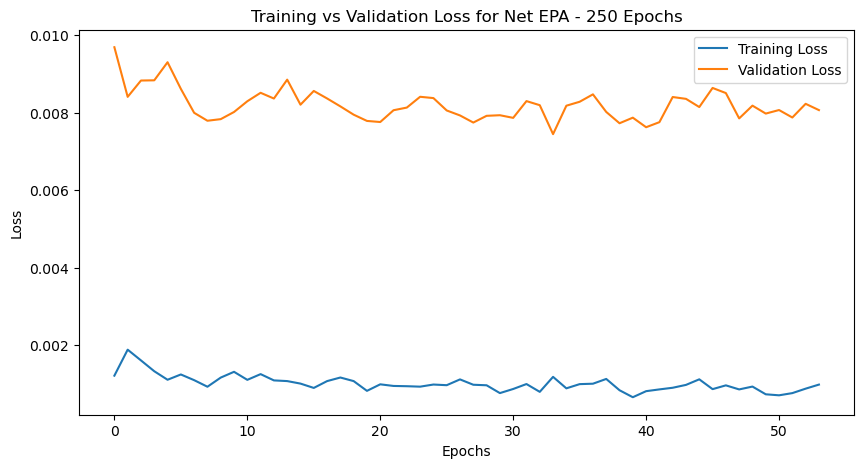

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 250 epochs: 0.5387
MAE for Net EPA after 250 epochs: 0.0683
RMSE for Net EPA after 250 epochs: 0.0863


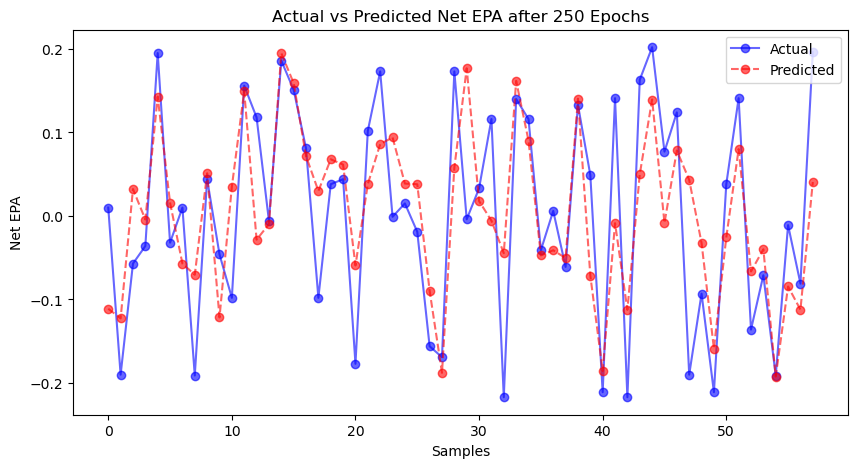


Preparing data for target metric: Total DVOA
Total sequences generated for Total DVOA: 288
X shape: (288, 3, 7), y shape: (288,)

Data Types in X_train: float64
Data Types in X_test: float64
Data Types in y_train: float64
Data Types in y_test: float64

Training Total DVOA with 5 epochs...
Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0637 - val_loss: 0.0365
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0331 - val_loss: 0.0347
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0259 - val_loss: 0.0336
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0262 - val_loss: 0.0321
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0272 - val_loss: 0.0321


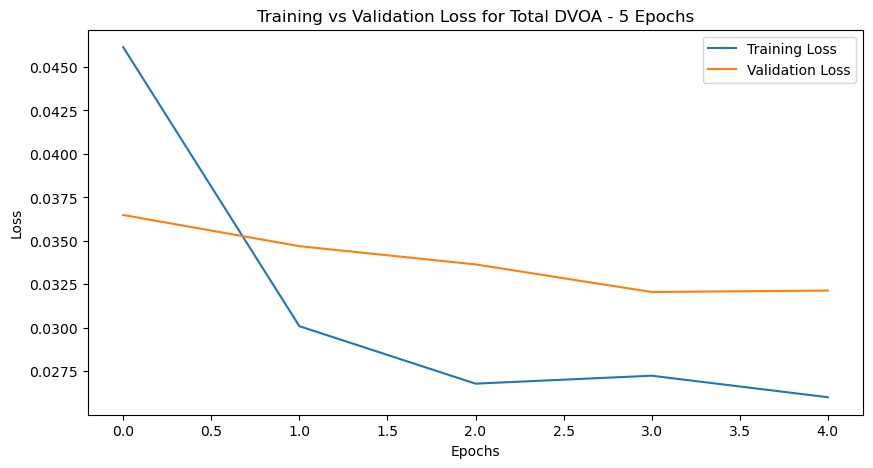

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
R² Score for Total DVOA after 5 epochs: 0.1279
MAE for Total DVOA after 5 epochs: 0.1530
RMSE for Total DVOA after 5 epochs: 0.1791


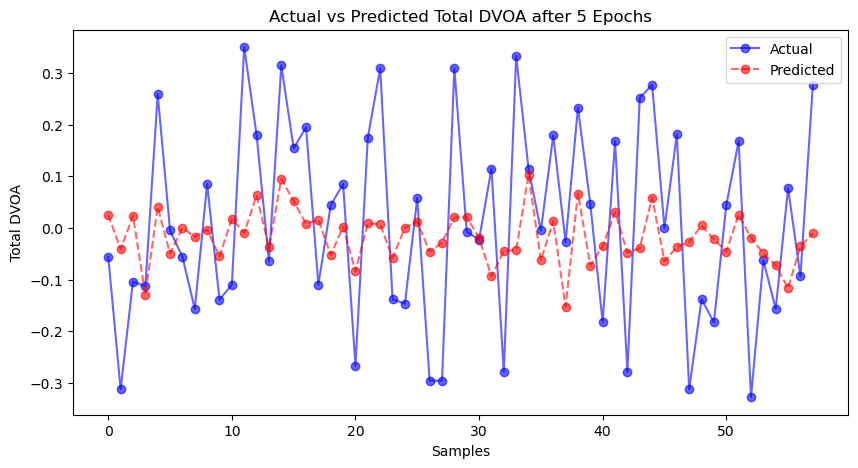


Training Total DVOA with 10 epochs...
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257 - val_loss: 0.0313
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0234 - val_loss: 0.0311
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0224 - val_loss: 0.0301
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0203 - val_loss: 0.0295
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0212 - val_loss: 0.0286
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0201 - val_loss: 0.0289
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0191 - val_loss: 0.0281
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0196 - val_loss: 0.0279
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0181 - val_loss: 0.0280
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0205 - val_loss: 0.0263


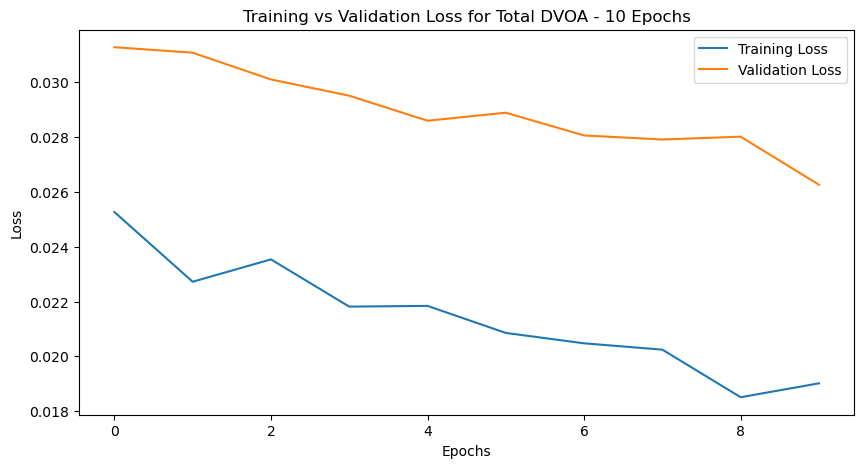

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Total DVOA after 10 epochs: 0.2855
MAE for Total DVOA after 10 epochs: 0.1351
RMSE for Total DVOA after 10 epochs: 0.1621


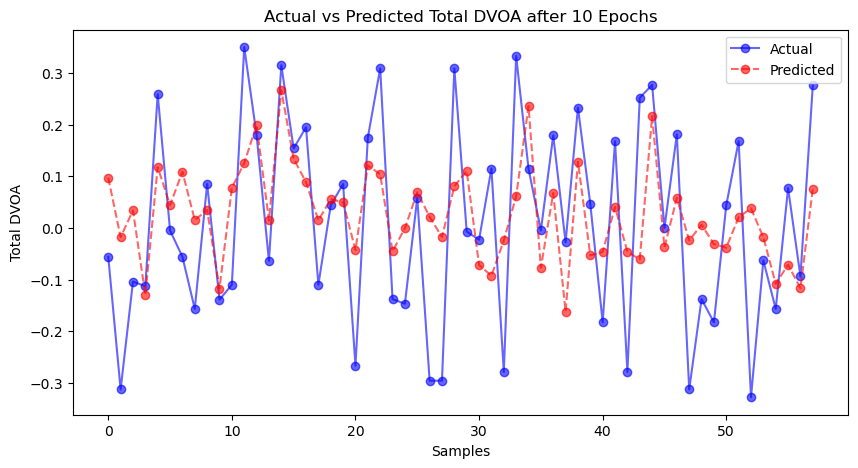


Training Total DVOA with 15 epochs...
Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179 - val_loss: 0.0258
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0157 - val_loss: 0.0259
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0185 - val_loss: 0.0245
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0142 - val_loss: 0.0253
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0168 - val_loss: 0.0240
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0139 - val_loss: 0.0239
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0131 - val_loss: 0.0250
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0124 - val_loss: 0.0228
Epoch 9/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0129 - val_loss: 0.0219
Epoch 10/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0133 - val_loss: 0.0218
Epoch 11/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0112 - val_loss: 0.0219
Epoch 12/15
29/29 ━━━━━━━━━━━━━━━━━

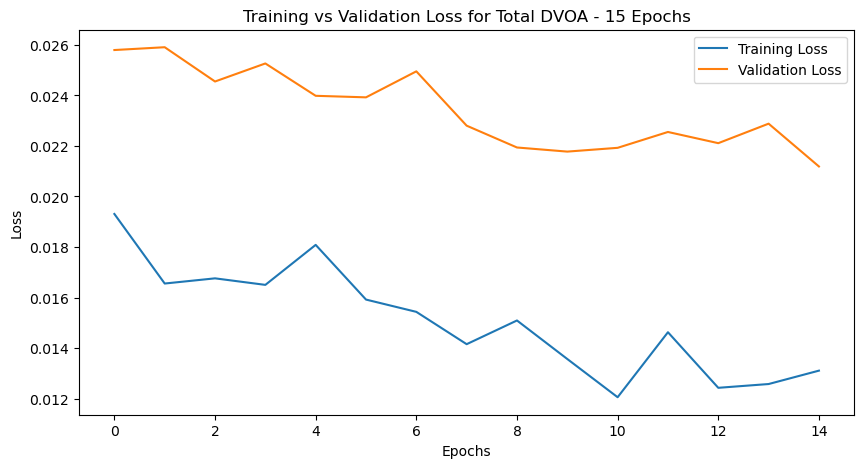

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
R² Score for Total DVOA after 15 epochs: 0.4236
MAE for Total DVOA after 15 epochs: 0.1192
RMSE for Total DVOA after 15 epochs: 0.1456


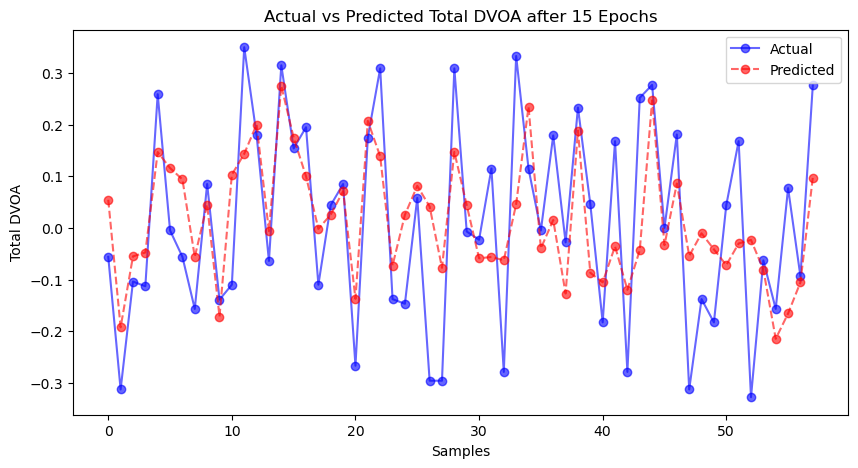


Training Total DVOA with 20 epochs...
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121 - val_loss: 0.0217
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0110 - val_loss: 0.0218
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0110 - val_loss: 0.0219
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0121 - val_loss: 0.0222
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108 - val_loss: 0.0215
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0097 - val_loss: 0.0212
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0093 - val_loss: 0.0204
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0090 - val_loss: 0.0211
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - val_loss: 0.0219
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091 - val_loss: 0.0199
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0089 - val_loss: 0.0212
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━

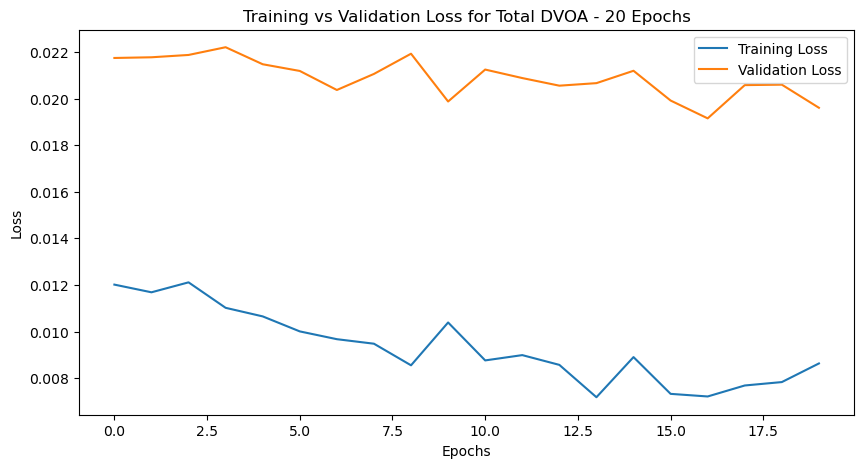

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
R² Score for Total DVOA after 20 epochs: 0.4791
MAE for Total DVOA after 20 epochs: 0.1101
RMSE for Total DVOA after 20 epochs: 0.1384


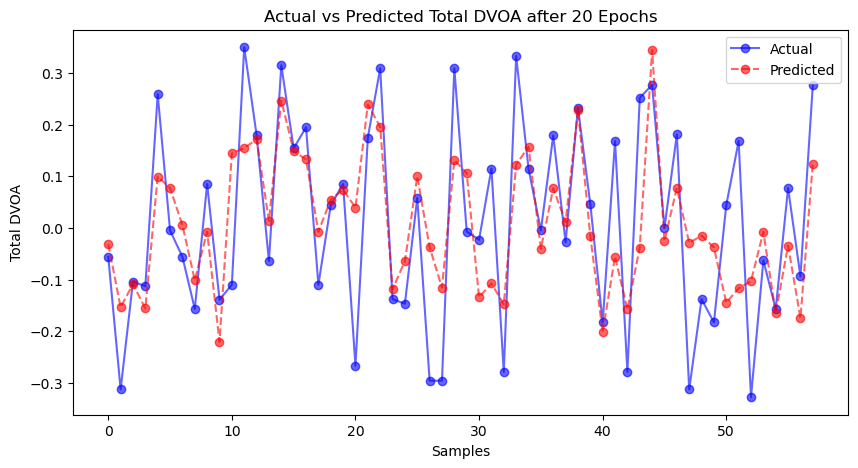


Training Total DVOA with 25 epochs...
Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080 - val_loss: 0.0201
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0088 - val_loss: 0.0213
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062 - val_loss: 0.0222
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - val_loss: 0.0189
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - val_loss: 0.0194
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - val_loss: 0.0207
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - val_loss: 0.0213
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - val_loss: 0.0192
Epoch 9/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0064 - val_loss: 0.0189
Epoch 10/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - val_loss: 0.0207
Epoch 11/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - val_loss: 0.0208
Epoch 12/25
29/29 ━━━━━━━━━━━━━━━━━

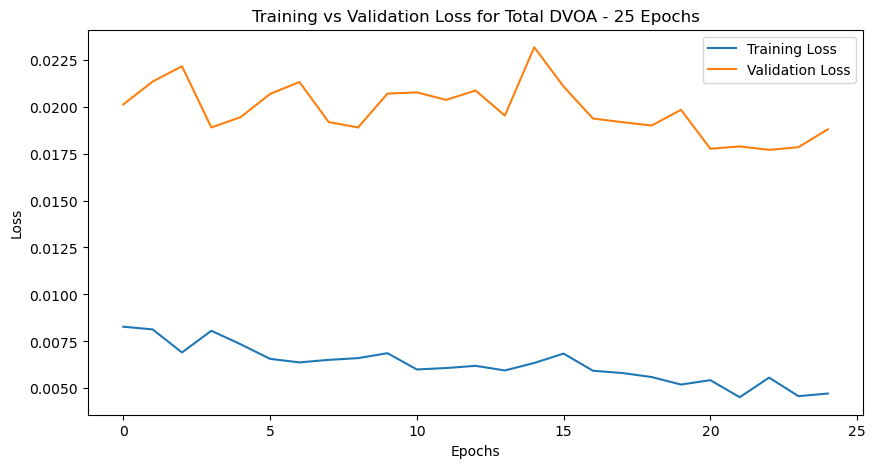

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Total DVOA after 25 epochs: 0.5185
MAE for Total DVOA after 25 epochs: 0.1046
RMSE for Total DVOA after 25 epochs: 0.1330


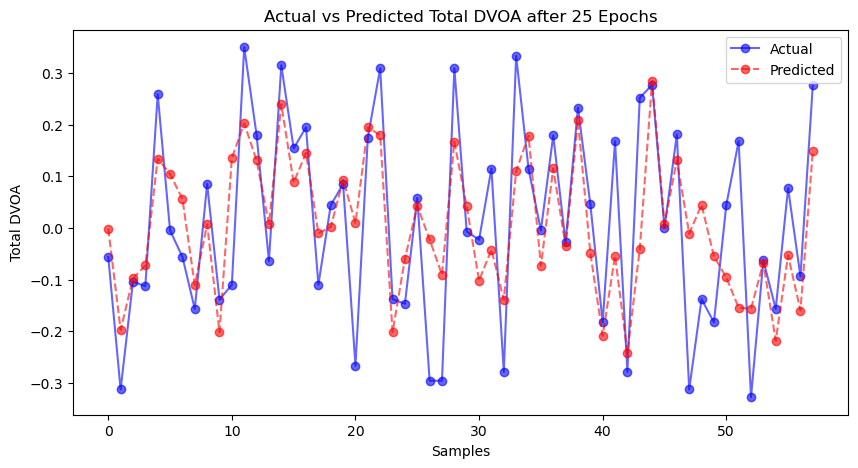


Training Total DVOA with 30 epochs...
Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050 - val_loss: 0.0187
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 - val_loss: 0.0188
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - val_loss: 0.0187
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0047 - val_loss: 0.0185
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - val_loss: 0.0191
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 - val_loss: 0.0213
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - val_loss: 0.0189
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_loss: 0.0216
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041 - val_loss: 0.0182
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0187
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 - val_loss: 0.0198
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━

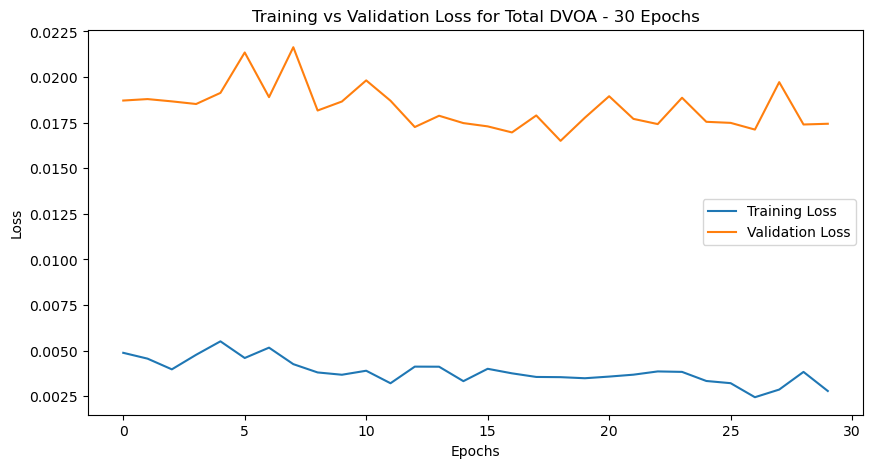

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Total DVOA after 30 epochs: 0.5511
MAE for Total DVOA after 30 epochs: 0.0972
RMSE for Total DVOA after 30 epochs: 0.1285


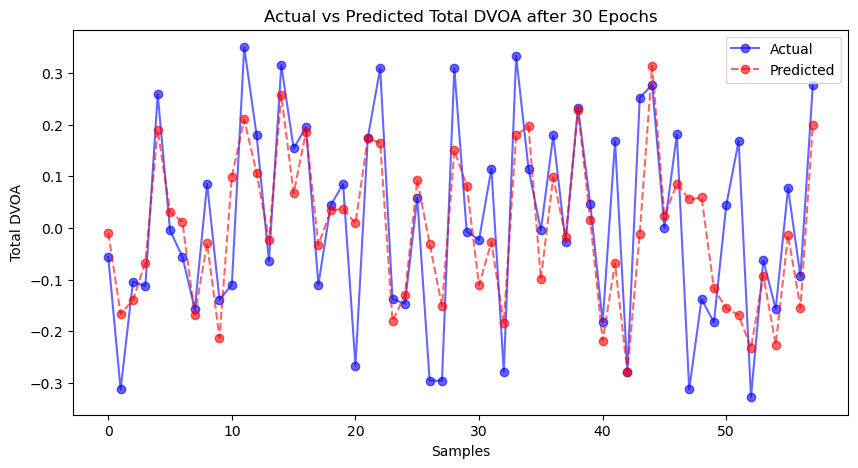


Training Total DVOA with 50 epochs...
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 0.0181
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 0.0173
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 - val_loss: 0.0168
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0169
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0172
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0184
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0180
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0171
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028 - val_loss: 0.0183
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0173
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 - val_loss: 0.0174
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━

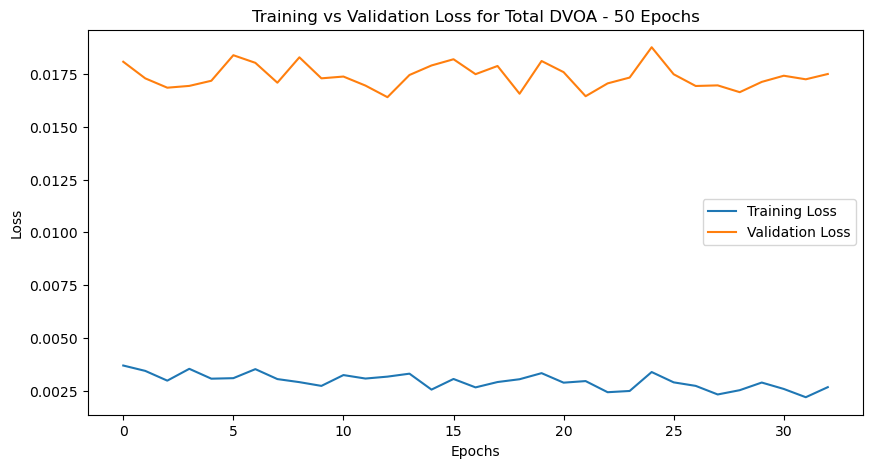

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R² Score for Total DVOA after 50 epochs: 0.5539
MAE for Total DVOA after 50 epochs: 0.0970
RMSE for Total DVOA after 50 epochs: 0.1281


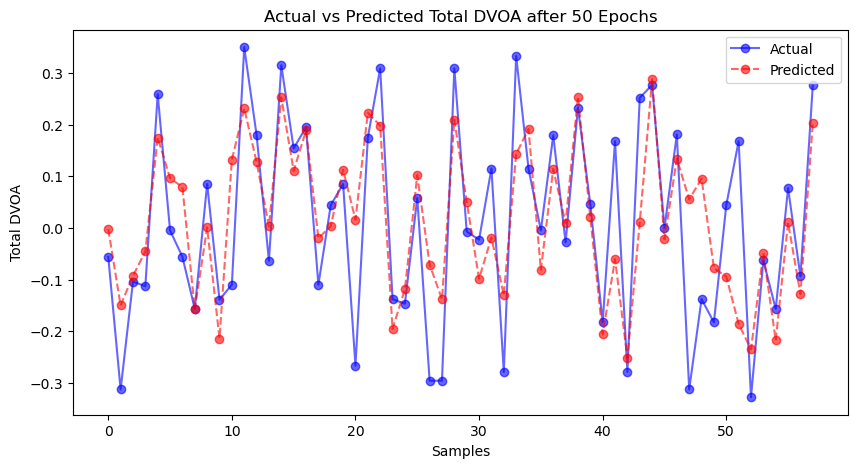


Training Total DVOA with 100 epochs...
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0186
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0177
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_loss: 0.0187
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043 - val_loss: 0.0182
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0174
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 0.0161
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0176
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0182
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0174
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0170
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0164
Epoch 12/100
29/29 ━━━━

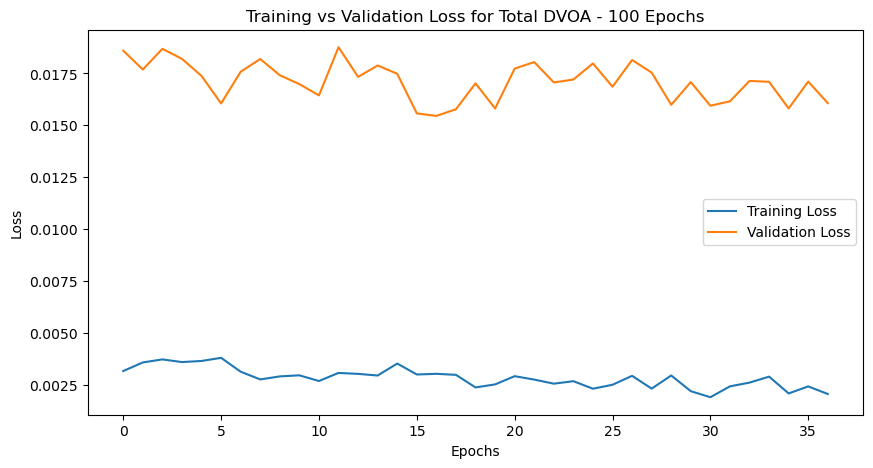

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Total DVOA after 100 epochs: 0.5796
MAE for Total DVOA after 100 epochs: 0.0954
RMSE for Total DVOA after 100 epochs: 0.1243


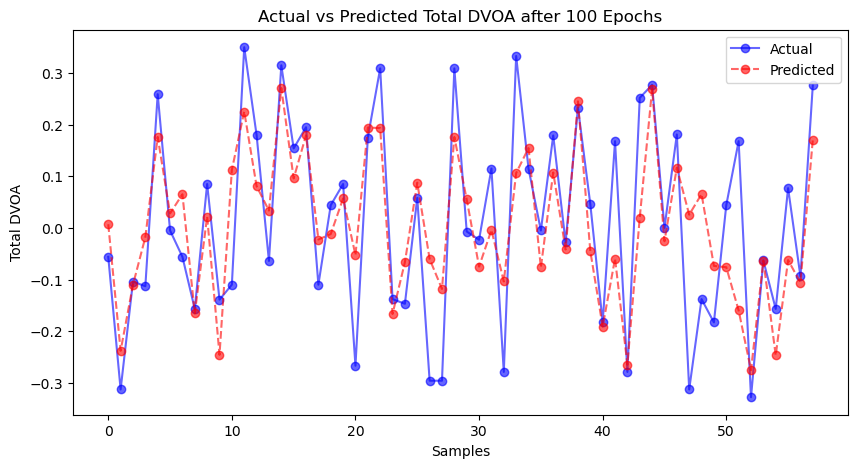


Training Total DVOA with 250 epochs...
Epoch 1/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0169
Epoch 2/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0158
Epoch 3/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036 - val_loss: 0.0195
Epoch 4/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0191
Epoch 5/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0190
Epoch 6/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0160
Epoch 7/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0166
Epoch 8/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - val_loss: 0.0164
Epoch 9/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - val_loss: 0.0158
Epoch 10/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - val_loss: 0.0161
Epoch 11/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0174
Epoch 12/250
29/29 ━━━━

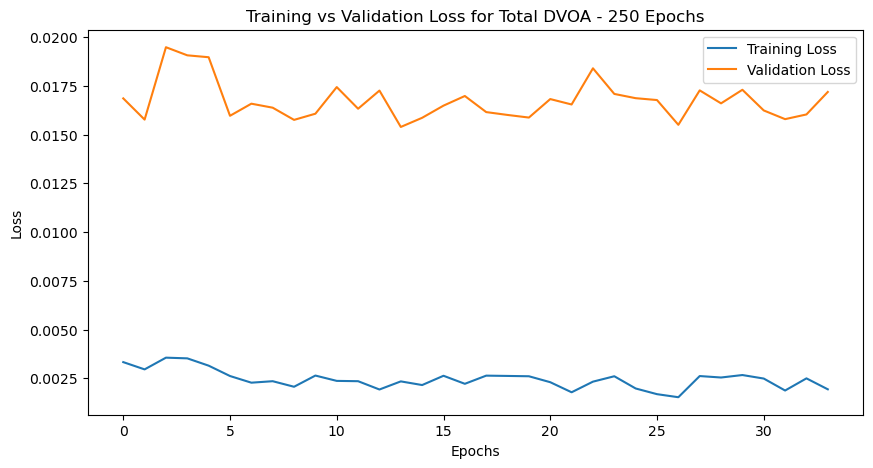

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step
R² Score for Total DVOA after 250 epochs: 0.5812
MAE for Total DVOA after 250 epochs: 0.0916
RMSE for Total DVOA after 250 epochs: 0.1241


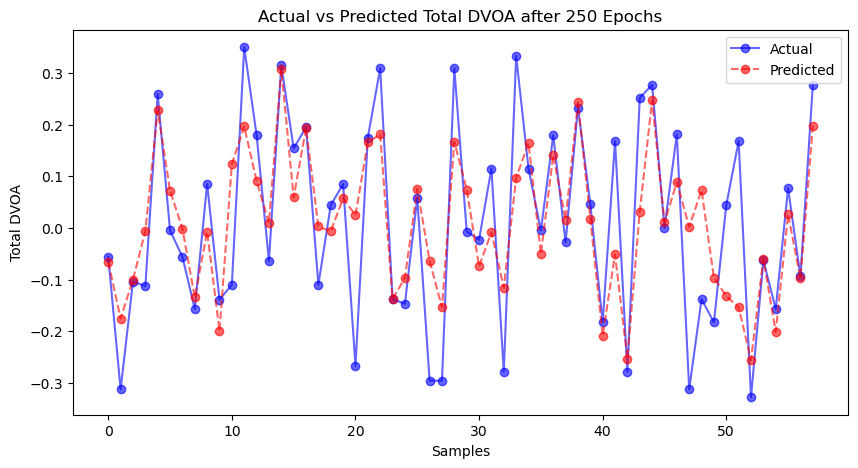

In [57]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer

# Function to clean percentage columns
def clean_percentage_column(lb_df, column):
    # Remove '%' and convert to float, then divide by 100 if it's a percentage
    lb_df[column] = lb_df[column].str.replace('%', '').astype(float) / 100.0
    return lb_df

# Function to prepare data sequences for a given target metric
def prepare_sequences(lb_df, target_metric, feature_cols, sequence_length=3, test_size=0.2):
    sequences = []
    targets = []
    team_data = lb_df.groupby('Team')

    for team, group in team_data:
        # Ensure the team has enough data
        if len(group) >= sequence_length + 1:
            # Iterate through the data to create sequences
            for i in range(len(group) - sequence_length):
                # Select the relevant columns for the sequence
                sequence = group.iloc[i:i+sequence_length][feature_cols]
                
                # The target is the next year's target_metric
                target = group.iloc[i+sequence_length][target_metric]
                
                sequences.append(sequence.values)
                targets.append(target)

    # Convert lists to numpy arrays
    X = np.array(sequences)
    y = np.array(targets)

    print(f"Total sequences generated for {target_metric}: {len(sequences)}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")

    # Reshape X to (samples, timesteps, features)
    X = X.reshape(X.shape[0], sequence_length, -1)

    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    inputs = Input(shape=input_shape)  # (timesteps, features)
    
    # Add a Dense layer before the attention to create more variability in the input
    dense_input = Dense(16, activation='relu')(inputs)
    
    # Add MultiHeadAttention layer
    attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)
    
    # Add Layer Normalization for stability
    attention_output = LayerNormalization()(attention_output)
    
    # Add LSTM layer to capture temporal dependencies
    lstm_output = LSTM(units=50, activation='relu')(attention_output)
    
    # Add Dropout to prevent overfitting
    lstm_output = Dropout(0.2)(lstm_output)
    
    # Output layer for predicting the target metric
    output = Dense(1)(lstm_output)
    
    # Define the model
    model = Model(inputs=inputs, outputs=output)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Function to train and evaluate the model
def train_and_evaluate(X_train, X_test, y_train, y_test, target_metric, epochs_list, batch_size=8):
    input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
    model = build_model(input_shape)
    
    # Debugging: Check data types
    print("\nData Types in X_train:", X_train.dtype)
    print("Data Types in X_test:", X_test.dtype)
    print("Data Types in y_train:", y_train.dtype)
    print("Data Types in y_test:", y_test.dtype)
    
    # Check for any non-numeric data
    if not np.issubdtype(X_train.dtype, np.number):
        raise ValueError("X_train contains non-numeric data.")
    if not np.issubdtype(X_test.dtype, np.number):
        raise ValueError("X_test contains non-numeric data.")
    if not np.issubdtype(y_train.dtype, np.number):
        raise ValueError("y_train contains non-numeric data.")
    if not np.issubdtype(y_test.dtype, np.number):
        raise ValueError("y_test contains non-numeric data.")
    
    for e in epochs_list:
        print(f"\nTraining {target_metric} with {e} epochs...")
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        history = model.fit(
            X_train, y_train, 
            epochs=e, 
            batch_size=batch_size, 
            validation_data=(X_test, y_test), 
            callbacks=[early_stopping],
            verbose=1
        )
        
        # Plot training & validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training vs Validation Loss for {target_metric} - {e} Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"R² Score for {target_metric} after {e} epochs: {r2:.4f}")
        print(f"MAE for {target_metric} after {e} epochs: {mae:.4f}")
        print(f"RMSE for {target_metric} after {e} epochs: {rmse:.4f}")
        
        # Plot actual vs predicted values with lines
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(y_test)), y_test, label='Actual', color='blue', linestyle='-', marker='o', alpha=0.6)
        plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='--', marker='o', alpha=0.6)
        plt.title(f'Actual vs Predicted {target_metric} after {e} Epochs')
        plt.xlabel('Samples')
        plt.ylabel(target_metric)
        plt.legend()
        plt.show()


# Main Execution
if __name__ == "__main__":
    # Load the data
    lb_df = pd.read_csv('Combined_Secondary_Defense.csv')
    
    # Define the intended target metrics with correct column names
    intended_target_metrics = ['Net EPA', 'Total DVOA']  # Corrected target metrics
    
    # Drop unnecessary columns
    columns_to_drop = ['Unnamed: 0']
    lb_df = lb_df.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to avoid issues if the column doesn't exist
    
    # Sort data by Team and Year
    lb_df = lb_df.sort_values(by=['Team', 'Year'])
    print("First few rows of the DataFrame:")
    print(lb_df.head())
    
    # Get the actual columns present
    actual_columns = lb_df.columns.tolist()
    
    # Filter target metrics to include only existing columns
    target_metrics = [metric for metric in intended_target_metrics if metric in actual_columns]
    
    # Notify the user about missing columns
    missing_metrics = [metric for metric in intended_target_metrics if metric not in actual_columns]
    if missing_metrics:
        print(f"Warning: The following target metrics are missing in the DataFrame and will be skipped: {missing_metrics}")
    
    # Encode 'Previous_franchise_id' if it exists
    if 'Previous_franchise_id' in actual_columns:
        print("Encoding 'Previous_franchise_id'...")
        label_encoder = LabelEncoder()
        lb_df['Previous_franchise_id_encoded'] = label_encoder.fit_transform(lb_df['Previous_franchise_id'])
        print("Encoding completed.")
    else:
        print("Warning: 'Previous_franchise_id' column is missing from the DataFrame.")
    
    # Update actual_columns after encoding
    actual_columns = lb_df.columns.tolist()
    
    # Define feature columns with encoded 'Previous_franchise_id'
    feature_columns = [
        'Previous_grades_tackle', 
        'Previous_AV',
        'Previous_PFF',
        'Previous_franchise_id_encoded',  # Use the encoded column
        'Previous_grades_run_defense',
        'Previous_grades_coverage_defense',
        'Previous_tackles_for_loss'
    ]
    
    # Check if all feature columns exist
    missing_features = [feature for feature in feature_columns if feature not in actual_columns]
    if missing_features:
        print(f"Error: The following feature columns are missing in the DataFrame: {missing_features}")
        raise ValueError("Missing feature columns. Please verify your DataFrame.")
    
    # Verify that all feature columns are numeric
    print("\nVerifying that all feature columns are numeric...")
    non_numeric_features = lb_df[feature_columns].select_dtypes(include=['object']).columns.tolist()
    if non_numeric_features:
        print(f"Error: The following feature columns contain non-numeric data: {non_numeric_features}")
        raise ValueError("Non-numeric data found in feature columns. Please encode or convert them to numeric types.")
    else:
        print("All feature columns are numeric.")
    
    # Check and handle non-numeric entries in feature columns
    print("\nChecking for non-numeric entries in feature columns...")
    for col in feature_columns:
        if lb_df[col].dtype == 'object':
            lb_df[col] = pd.to_numeric(lb_df[col], errors='coerce')
            print(f"Converted '{col}' to numeric. Non-convertible values are set to NaN.")
    
    # Check for NaN values in feature and target columns
    print("\nChecking for NaN values in feature and target columns...")
    nan_counts = lb_df[feature_columns + target_metrics].isnull().sum()
    print(nan_counts)
    
    # Handle NaN values in target metrics by cleaning percentage strings and converting to numeric
    for metric in target_metrics:
        if lb_df[metric].dtype == 'object':
            # Check if the column contains '%'
            if lb_df[metric].str.contains('%').any():
                print(f"\nCleaning percentage values in '{metric}'...")
                lb_df = clean_percentage_column(lb_df, metric)
                print(f"'{metric}' cleaned.")
            else:
                # Attempt to convert to numeric, coercing errors to NaN
                lb_df[metric] = pd.to_numeric(lb_df[metric], errors='coerce')
                print(f"Converted '{metric}' to numeric.")
    
    # Check for NaN values again after cleaning target metrics
    print("\nChecking for NaN values in target metrics after cleaning:")
    print(lb_df[target_metrics].isnull().sum())
    
    # Drop rows with NaN in target metrics
    lb_df_clean = lb_df.dropna(subset=target_metrics)
    print(f"\nNumber of rows after dropping NaN in target metrics: {lb_df_clean.shape[0]}")
    
    # Initialize the imputer with a strategy (e.g., mean)
    imputer = SimpleImputer(strategy='mean')
    
    # Fit and transform the feature columns
    lb_df_clean[feature_columns] = imputer.fit_transform(lb_df_clean[feature_columns])
    
    # Verify that there are no NaNs left in feature columns
    print("\nNumber of NaN values in feature columns after imputation:")
    print(lb_df_clean[feature_columns].isnull().sum())
    
    # Convert X_train, X_test, y_train, y_test to appropriate data types
    # This is already handled in the prepare_sequences function
    
    # Iterate over each valid target metric
    for metric in target_metrics:
        print(f"\nPreparing data for target metric: {metric}")
        X_train, X_test, y_train, y_test, scaler = prepare_sequences(lb_df_clean, metric, feature_columns)
        
        # Define the list of epochs you want to train for
        epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
        
        # Train and evaluate the model
        train_and_evaluate(X_train, X_test, y_train, y_test, metric, epoch_list)
